In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, recall_score
from sklearn.svm import SVC

In [2]:
lulc = pd.read_csv("lulc2013-2020.ascii",delim_whitespace=" ",header=None)
NDVI = pd.read_csv("ndvi2013-2020.ascii",delim_whitespace=" ",header=None)
RD = pd.read_csv("road2013-2020.ascii",delim_whitespace=" ",header=None)
NTL = pd.read_csv("light2013-2020.ascii",delim_whitespace=" ",header=None)
NLST = pd.read_csv("NLST_WinterHalf_13to20.txt",delim_whitespace=" ",header=None)

features = ['LAT', 'LON', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

lulc.columns=features
NDVI.columns=features
RD.columns=features
NTL.columns=features
NLST.columns=features

label = [0] * 26458

NDVI['LABEL2013'] = label
NDVI['LABEL2014'] = label
NDVI['LABEL2015'] = label
NDVI['LABEL2016'] = label
NDVI['LABEL2017'] = label
NDVI['LABEL2018'] = label
NDVI['LABEL2019'] = label
NDVI['LABEL2020'] = label

NTL['LABEL2013'] = label
NTL['LABEL2014'] = label
NTL['LABEL2015'] = label
NTL['LABEL2016'] = label
NTL['LABEL2017'] = label
NTL['LABEL2018'] = label
NTL['LABEL2019'] = label
NTL['LABEL2020'] = label

RD['LABEL2013'] = label
RD['LABEL2014'] = label
RD['LABEL2015'] = label
RD['LABEL2016'] = label
RD['LABEL2017'] = label
RD['LABEL2018'] = label
RD['LABEL2019'] = label
RD['LABEL2020'] = label

NLST['LABEL2013'] = label
NLST['LABEL2014'] = label
NLST['LABEL2015'] = label
NLST['LABEL2016'] = label
NLST['LABEL2017'] = label
NLST['LABEL2018'] = label
NLST['LABEL2019'] = label
NLST['LABEL2020'] = label

lulc5class = lulc[['LAT', 'LON']].copy()
lulc5class['2013'] = label
lulc5class['2014'] = label
lulc5class['2015'] = label
lulc5class['2016'] = label
lulc5class['2017'] = label
lulc5class['2018'] = label
lulc5class['2019'] = label
lulc5class['2020'] = label


In [3]:

for i in range(26458):
    for year in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        value = lulc[year].loc[i]
        if value in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
            lulc5class[year].loc[i] = 1
        elif value == 10:
            lulc5class[year].loc[i] = 2
        elif value in [11, 15, 17]:
            lulc5class[year].loc[i] = 3
            NDVI['LABEL'+year].loc[i] = 1
            NTL['LABEL'+year].loc[i] = 1
            RD['LABEL'+year].loc[i] = 1
            NLST['LABEL'+year].loc[i] = 1
        elif value == 12 or value == 14:
            lulc5class[year].loc[i] = 4
        elif value == 13:
            lulc5class[year].loc[i] = 5
            NDVI['LABEL'+year].loc[i] = 4
            NTL['LABEL'+year].loc[i] = 4
            RD['LABEL'+year].loc[i] = 4
            NLST['LABEL'+year].loc[i] = 4
        elif value == 16:
            lulc5class[year].loc[i] = 6

/Applications/anaconda3/envs/ML_env/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
NDVI_2013 = NDVI[['LAT','LON','2013','LABEL2013']].copy() 
RD_2013 = RD[['LAT','LON','2013','LABEL2013']].copy() 
NTL_2013 = NTL[['LAT','LON','2013','LABEL2013']].copy() 
NLST_2013 = NLST[['LAT','LON','2013','LABEL2013']].copy() 
NDVI_2013_Urban = NDVI_2013[(NDVI_2013['LABEL2013'] == 4)]
RD_2013_Urban = RD_2013[(RD_2013['LABEL2013'] == 4)]
NTL_2013_Urban = NTL_2013[(NTL_2013['LABEL2013'] == 4)]
NLST_2013_Urban = NLST_2013[(NLST_2013['LABEL2013'] == 4)]
NDVI_2013_Water = NDVI_2013[(NDVI_2013['LABEL2013'] == 1)]
RD_2013_Water = RD_2013[(RD_2013['LABEL2013'] == 1)]
NTL_2013_Water = NTL_2013[(NTL_2013['LABEL2013'] == 1)]
NLST_2013_Water = NLST_2013[(NLST_2013['LABEL2013'] == 1)]
NDVI_2013_NotUrban = NDVI_2013[(NDVI_2013['LABEL2013'] != 4)]
RD_2013_NotUrban = RD_2013[(RD_2013['LABEL2013'] != 4)]
NTL_2013_NotUrban = NTL_2013[(NTL_2013['LABEL2013'] != 4)]
NLST_2013_NotUrban = NLST_2013[(NLST_2013['LABEL2013'] != 4)]
NDVI_2013_NotUrbanNotWater = NDVI_2013_NotUrban[(NDVI_2013_NotUrban['LABEL2013'] != 1)]
RD_2013_NotUrbanNotWater = RD_2013_NotUrban[(RD_2013_NotUrban['LABEL2013'] != 1)]
NTL_2013_NotUrbanNotWater = NTL_2013_NotUrban[(NTL_2013_NotUrban['LABEL2013'] != 1)]
NLST_2013_NotUrbanNotWater = NLST_2013_NotUrban[(NLST_2013_NotUrban['LABEL2013'] != 1)]

NDVI_2014 = NDVI[['LAT','LON','2014','LABEL2014']].copy() 
RD_2014 = RD[['LAT','LON','2014','LABEL2014']].copy() 
NTL_2014 = NTL[['LAT','LON','2014','LABEL2014']].copy() 
NLST_2014 = NLST[['LAT','LON','2014','LABEL2014']].copy() 
NDVI_2014_Urban = NDVI_2014[(NDVI_2014['LABEL2014'] == 4)]
RD_2014_Urban = RD_2014[(RD_2014['LABEL2014'] == 4)]
NTL_2014_Urban = NTL_2014[(NTL_2014['LABEL2014'] == 4)]
NLST_2014_Urban = NLST_2014[(NLST_2014['LABEL2014'] == 4)]
NDVI_2014_Water = NDVI_2014[(NDVI_2014['LABEL2014'] == 1)]
RD_2014_Water = RD_2014[(RD_2014['LABEL2014'] == 1)]
NTL_2014_Water = NTL_2014[(NTL_2014['LABEL2014'] == 1)]
NLST_2014_Water = NLST_2014[(NLST_2014['LABEL2014'] == 1)]
NDVI_2014_NotUrban = NDVI_2014[(NDVI_2014['LABEL2014'] != 4)]
RD_2014_NotUrban = RD_2014[(RD_2014['LABEL2014'] != 4)]
NTL_2014_NotUrban = NTL_2014[(NTL_2014['LABEL2014'] != 4)]
NLST_2014_NotUrban = NLST_2014[(NLST_2014['LABEL2014'] != 4)]
NDVI_2014_NotUrbanNotWater = NDVI_2014_NotUrban[(NDVI_2014_NotUrban['LABEL2014'] != 1)]
RD_2014_NotUrbanNotWater = RD_2014_NotUrban[(RD_2014_NotUrban['LABEL2014'] != 1)]
NTL_2014_NotUrbanNotWater = NTL_2014_NotUrban[(NTL_2014_NotUrban['LABEL2014'] != 1)]
NLST_2014_NotUrbanNotWater = NLST_2014_NotUrban[(NLST_2014_NotUrban['LABEL2014'] != 1)]

NDVI_2015 = NDVI[['LAT','LON','2015','LABEL2015']].copy() 
RD_2015 = RD[['LAT','LON','2015','LABEL2015']].copy() 
NTL_2015 = NTL[['LAT','LON','2015','LABEL2015']].copy() 
NLST_2015 = NLST[['LAT','LON','2015','LABEL2015']].copy() 
NDVI_2015_Urban = NDVI_2015[(NDVI_2015['LABEL2015'] == 4)]
RD_2015_Urban = RD_2015[(RD_2015['LABEL2015'] == 4)]
NTL_2015_Urban = NTL_2015[(NTL_2015['LABEL2015'] == 4)]
NLST_2015_Urban = NLST_2015[(NLST_2015['LABEL2015'] == 4)]
NDVI_2015_Water = NDVI_2015[(NDVI_2015['LABEL2015'] == 1)]
RD_2015_Water = RD_2015[(RD_2015['LABEL2015'] == 1)]
NTL_2015_Water = NTL_2015[(NTL_2015['LABEL2015'] == 1)]
NLST_2015_Water = NLST_2015[(NLST_2015['LABEL2015'] == 1)]
NDVI_2015_NotUrban = NDVI_2015[(NDVI_2015['LABEL2015'] != 4)]
RD_2015_NotUrban = RD_2015[(RD_2015['LABEL2015'] != 4)]
NTL_2015_NotUrban = NTL_2015[(NTL_2015['LABEL2015'] != 4)]
NLST_2015_NotUrban = NLST_2015[(NLST_2015['LABEL2015'] != 4)]
NDVI_2015_NotUrbanNotWater = NDVI_2015_NotUrban[(NDVI_2015_NotUrban['LABEL2015'] != 1)]
RD_2015_NotUrbanNotWater = RD_2015_NotUrban[(RD_2015_NotUrban['LABEL2015'] != 1)]
NTL_2015_NotUrbanNotWater = NTL_2015_NotUrban[(NTL_2015_NotUrban['LABEL2015'] != 1)]
NLST_2015_NotUrbanNotWater = NLST_2015_NotUrban[(NLST_2015_NotUrban['LABEL2015'] != 1)]

NDVI_2016 = NDVI[['LAT','LON','2016','LABEL2016']].copy() 
RD_2016 = RD[['LAT','LON','2016','LABEL2016']].copy() 
NTL_2016 = NTL[['LAT','LON','2016','LABEL2016']].copy() 
NLST_2016 = NLST[['LAT','LON','2016','LABEL2016']].copy() 
NDVI_2016_Urban = NDVI_2016[(NDVI_2016['LABEL2016'] == 4)]
RD_2016_Urban = RD_2016[(RD_2016['LABEL2016'] == 4)]
NTL_2016_Urban = NTL_2016[(NTL_2016['LABEL2016'] == 4)]
NLST_2016_Urban = NLST_2016[(NLST_2016['LABEL2016'] == 4)]
NDVI_2016_Water = NDVI_2016[(NDVI_2016['LABEL2016'] == 1)]
RD_2016_Water = RD_2016[(RD_2016['LABEL2016'] == 1)]
NTL_2016_Water = NTL_2016[(NTL_2016['LABEL2016'] == 1)]
NLST_2016_Water = NLST_2016[(NLST_2016['LABEL2016'] == 1)]
NDVI_2016_NotUrban = NDVI_2016[(NDVI_2016['LABEL2016'] != 4)]
RD_2016_NotUrban = RD_2016[(RD_2016['LABEL2016'] != 4)]
NTL_2016_NotUrban = NTL_2016[(NTL_2016['LABEL2016'] != 4)]
NLST_2016_NotUrban = NLST_2016[(NLST_2016['LABEL2016'] != 4)]
NDVI_2016_NotUrbanNotWater = NDVI_2016_NotUrban[(NDVI_2016_NotUrban['LABEL2016'] != 1)]
RD_2016_NotUrbanNotWater = RD_2016_NotUrban[(RD_2016_NotUrban['LABEL2016'] != 1)]
NTL_2016_NotUrbanNotWater = NTL_2016_NotUrban[(NTL_2016_NotUrban['LABEL2016'] != 1)]
NLST_2016_NotUrbanNotWater = NLST_2016_NotUrban[(NLST_2016_NotUrban['LABEL2016'] != 1)]

NDVI_2017 = NDVI[['LAT','LON','2017','LABEL2017']].copy() 
RD_2017 = RD[['LAT','LON','2017','LABEL2017']].copy() 
NTL_2017 = NTL[['LAT','LON','2017','LABEL2017']].copy() 
NLST_2017 = NLST[['LAT','LON','2017','LABEL2017']].copy() 
NDVI_2017_Urban = NDVI_2017[(NDVI_2017['LABEL2017'] == 4)]
RD_2017_Urban = RD_2017[(RD_2017['LABEL2017'] == 4)]
NTL_2017_Urban = NTL_2017[(NTL_2017['LABEL2017'] == 4)]
NLST_2017_Urban = NLST_2017[(NLST_2017['LABEL2017'] == 4)]
NDVI_2017_Water = NDVI_2017[(NDVI_2017['LABEL2017'] == 1)]
RD_2017_Water = RD_2017[(RD_2017['LABEL2017'] == 1)]
NTL_2017_Water = NTL_2017[(NTL_2017['LABEL2017'] == 1)]
NLST_2017_Water = NLST_2017[(NLST_2017['LABEL2017'] == 1)]
NDVI_2017_NotUrban = NDVI_2017[(NDVI_2017['LABEL2017'] != 4)]
RD_2017_NotUrban = RD_2017[(RD_2017['LABEL2017'] != 4)]
NTL_2017_NotUrban = NTL_2017[(NTL_2017['LABEL2017'] != 4)]
NLST_2017_NotUrban = NLST_2017[(NLST_2017['LABEL2017'] != 4)]
NDVI_2017_NotUrbanNotWater = NDVI_2017_NotUrban[(NDVI_2017_NotUrban['LABEL2017'] != 1)]
RD_2017_NotUrbanNotWater = RD_2017_NotUrban[(RD_2017_NotUrban['LABEL2017'] != 1)]
NTL_2017_NotUrbanNotWater = NTL_2017_NotUrban[(NTL_2017_NotUrban['LABEL2017'] != 1)]
NLST_2017_NotUrbanNotWater = NLST_2017_NotUrban[(NLST_2017_NotUrban['LABEL2017'] != 1)]

NDVI_2018 = NDVI[['LAT','LON','2018','LABEL2018']].copy() 
RD_2018 = RD[['LAT','LON','2018','LABEL2018']].copy() 
NTL_2018 = NTL[['LAT','LON','2018','LABEL2018']].copy() 
NLST_2018 = NLST[['LAT','LON','2018','LABEL2018']].copy() 
NDVI_2018_Urban = NDVI_2018[(NDVI_2018['LABEL2018'] == 4)]
RD_2018_Urban = RD_2018[(RD_2018['LABEL2018'] == 4)]
NTL_2018_Urban = NTL_2018[(NTL_2018['LABEL2018'] == 4)]
NLST_2018_Urban = NLST_2018[(NLST_2018['LABEL2018'] == 4)]
NDVI_2018_Water = NDVI_2018[(NDVI_2018['LABEL2018'] == 1)]
RD_2018_Water = RD_2018[(RD_2018['LABEL2018'] == 1)]
NTL_2018_Water = NTL_2018[(NTL_2018['LABEL2018'] == 1)]
NLST_2018_Water = NLST_2018[(NLST_2018['LABEL2018'] == 1)]
NDVI_2018_NotUrban = NDVI_2018[(NDVI_2018['LABEL2018'] != 4)]
RD_2018_NotUrban = RD_2018[(RD_2018['LABEL2018'] != 4)]
NTL_2018_NotUrban = NTL_2018[(NTL_2018['LABEL2018'] != 4)]
NLST_2018_NotUrban = NLST_2018[(NLST_2018['LABEL2018'] != 4)]
NDVI_2018_NotUrbanNotWater = NDVI_2018_NotUrban[(NDVI_2018_NotUrban['LABEL2018'] != 1)]
RD_2018_NotUrbanNotWater = RD_2018_NotUrban[(RD_2018_NotUrban['LABEL2018'] != 1)]
NTL_2018_NotUrbanNotWater = NTL_2018_NotUrban[(NTL_2018_NotUrban['LABEL2018'] != 1)]
NLST_2018_NotUrbanNotWater = NLST_2018_NotUrban[(NLST_2018_NotUrban['LABEL2018'] != 1)]

NDVI_2019 = NDVI[['LAT','LON','2019','LABEL2019']].copy() 
RD_2019 = RD[['LAT','LON','2019','LABEL2019']].copy() 
NTL_2019 = NTL[['LAT','LON','2019','LABEL2019']].copy() 
NLST_2019 = NLST[['LAT','LON','2019','LABEL2019']].copy() 
NDVI_2019_Urban = NDVI_2019[(NDVI_2019['LABEL2019'] == 4)]
RD_2019_Urban = RD_2019[(RD_2019['LABEL2019'] == 4)]
NTL_2019_Urban = NTL_2019[(NTL_2019['LABEL2019'] == 4)]
NLST_2019_Urban = NLST_2019[(NLST_2019['LABEL2019'] == 4)]
NDVI_2019_Water = NDVI_2019[(NDVI_2019['LABEL2019'] == 1)]
RD_2019_Water = RD_2019[(RD_2019['LABEL2019'] == 1)]
NTL_2019_Water = NTL_2019[(NTL_2019['LABEL2019'] == 1)]
NLST_2019_Water = NLST_2019[(NLST_2019['LABEL2019'] == 1)]
NDVI_2019_NotUrban = NDVI_2019[(NDVI_2019['LABEL2019'] != 4)]
RD_2019_NotUrban = RD_2019[(RD_2019['LABEL2019'] != 4)]
NTL_2019_NotUrban = NTL_2019[(NTL_2019['LABEL2019'] != 4)]
NLST_2019_NotUrban = NLST_2019[(NLST_2019['LABEL2019'] != 4)]
NDVI_2019_NotUrbanNotWater = NDVI_2019_NotUrban[(NDVI_2019_NotUrban['LABEL2019'] != 1)]
RD_2019_NotUrbanNotWater = RD_2019_NotUrban[(RD_2019_NotUrban['LABEL2019'] != 1)]
NTL_2019_NotUrbanNotWater = NTL_2019_NotUrban[(NTL_2019_NotUrban['LABEL2019'] != 1)]
NLST_2019_NotUrbanNotWater = NLST_2019_NotUrban[(NLST_2019_NotUrban['LABEL2019'] != 1)]

NDVI_2020 = NDVI[['LAT','LON','2020','LABEL2020']].copy() 
RD_2020 = RD[['LAT','LON','2020','LABEL2020']].copy() 
NTL_2020 = NTL[['LAT','LON','2020','LABEL2020']].copy() 
NLST_2020 = NLST[['LAT','LON','2020','LABEL2020']].copy() 
NDVI_2020_Urban = NDVI_2020[(NDVI_2020['LABEL2020'] == 4)]
RD_2020_Urban = RD_2020[(RD_2020['LABEL2020'] == 4)]
NTL_2020_Urban = NTL_2020[(NTL_2020['LABEL2020'] == 4)]
NLST_2020_Urban = NLST_2020[(NLST_2020['LABEL2020'] == 4)]
NDVI_2020_Water = NDVI_2020[(NDVI_2020['LABEL2020'] == 1)]
RD_2020_Water = RD_2020[(RD_2020['LABEL2020'] == 1)]
NTL_2020_Water = NTL_2020[(NTL_2020['LABEL2020'] == 1)]
NLST_2020_Water = NLST_2020[(NLST_2020['LABEL2020'] == 1)]
NDVI_2020_NotUrban = NDVI_2020[(NDVI_2020['LABEL2020'] != 4)]
RD_2020_NotUrban = RD_2020[(RD_2020['LABEL2020'] != 4)]
NTL_2020_NotUrban = NTL_2020[(NTL_2020['LABEL2020'] != 4)]
NLST_2020_NotUrban = NLST_2020[(NLST_2020['LABEL2020'] != 4)]
NDVI_2020_NotUrbanNotWater = NDVI_2020_NotUrban[(NDVI_2020_NotUrban['LABEL2020'] != 1)]
RD_2020_NotUrbanNotWater = RD_2020_NotUrban[(RD_2020_NotUrban['LABEL2020'] != 1)]
NTL_2020_NotUrbanNotWater = NTL_2020_NotUrban[(NTL_2020_NotUrban['LABEL2020'] != 1)]
NLST_2020_NotUrbanNotWater = NLST_2020_NotUrban[(NLST_2020_NotUrban['LABEL2020'] != 1)]

In [5]:
RD2013_Stats = np.array([0,0,0,0,0,0,558.041960,1112.438963,6247.438480])
RD2014_Stats = np.array([0,0,0,0,0,0,978.329410,2563.660348,8735.687500])
RD2015_Stats = np.array([0,0,0,0,0,376.803450,1408.428162,3396.927272,8755.502930])
RD2016_Stats = np.array([0,0,0,0,0,556.585085,2606.148110,5157.787265,10251.362300])
RD2017_Stats = np.array([0,0,0,0,0,599.366730,3140.882935,5780.547115,10251.362300])
RD2018_Stats = np.array([0,0,0,0,0,606.262080,3168.287352,5884.176035,10251.362300])
RD2019_Stats = np.array([0,0,0,0,0,625.921232,3167.780704,5889.033171,10251.362300])
RD2020_Stats = np.array([0,0,0,0,0,655.783690,3229.035400,5946.476814,10391.162110])

NDVI2013_Stats = np.array([0.006310,0.329295,0.368230,0.406575,0.428990,0.451680,0.497855,0.549734,0.676060])
NDVI2014_Stats = np.array([0.01534,0.31944,0.35232,0.39562,0.42403,0.45191,0.50575,0.57044,0.68919,])
NDVI2015_Stats = np.array([0.001440,0.313796,0.339270,0.377435,0.404515,0.433180,0.487600,0.553323,0.690870])
NDVI2016_Stats = np.array([0.084000,0.298626,0.326649,0.360650,0.382765,0.406303,0.459164,0.522264,0.68354])
NDVI2017_Stats = np.array([0.016320,0.314050,0.354115,0.394945,0.423150,0.453055,0.505440,0.562915,0.692900])
NDVI2018_Stats = np.array([0.028490,0.290248,0.325766,0.366240,0.390020,0.414450,0.466064,0.539572,0.693560])
NDVI2019_Stats = np.array([0.034230,0.283785,0.322558,0.362320,0.385895,0.410930,0.464591,0.532113,0.701080])
NDVI2020_Stats = np.array([0.124510,0.317275,0.369860,0.416120,0.443110,0.470660,0.526102,0.578686,0.701330])

NTL2013_Stats = np.array([0.052080,0.117029,0.220620,0.474755,0.898780,1.922630,6.962390,15.433894,166.173920])
NTL2014_Stats = np.array([0.121830,0.189728,0.316550,0.615650,1.086410,2.250460,8.168370,18.230936,139.583240])
NTL2015_Stats = np.array([0.120000,0.226231,0.338837,0.617167,1.059640,2.221200,8.209082,18.110648,116.407750])
NTL2016_Stats = np.array([0.065810,0.145933,0.262828,0.538498,0.980750,2.151752,8.469348,19.178180,133.405980])
NTL2017_Stats = np.array([0.266930,0.339335,0.459495,0.765120,1.249190,2.520820,9.396260,20.549545,113.043390])
NTL2018_Stats = np.array([0.288410,0.383675,0.505946,0.819290,1.309870,2.593840,9.207640,19.376706,79.393230])
NTL2019_Stats = np.array([0.264740,0.361753,0.562240,0.945805,1.563625,3.146050,10.597157,21.035070,104.566140])
NTL2020_Stats = np.array([0.324180,0.436717,0.591118,0.958160,1.515770,2.978240,10.412932,20.602327,106.105190])

NLST2013_Stats = np.array([287.285110,288.048590,288.656923,289.372720,289.908410,290.732959,291.660587,292.370998,294.589492])
NLST2014_Stats = np.array([287.704293,288.619973,289.154898,289.895568,290.460287,291.238315,292.223480,292.973070,295.166597])
NLST2015_Stats = np.array([287.714853,288.427444,288.867664,289.549443,290.218842,290.890540,291.775363,292.491522,294.795607])
NLST2016_Stats = np.array([287.127640,287.982581,288.652156,289.380648,290.043414,290.859635,291.870475,292.733057,295.083667])
NLST2017_Stats = np.array([287.135442,288.091897,288.781463,289.498207,290.071140,290.849413,291.895694,292.797523,295.047878])
NLST2018_Stats = np.array([241.472825,289.383476,289.920992,290.616288,291.038900,291.675645,292.504277,293.060004,294.953475])
NLST2019_Stats = np.array([288.702422,289.265219,289.739503,290.377565,290.835513,291.485930,292.262664,292.898314,294.806772])
NLST2020_Stats = np.array([288.064313,288.709629,289.291594,290.011147,290.526907,291.117690,291.991338,293.069216,296.132568])

In [6]:
Rule1_2013_NotUrbanNotWater = RD_2013_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2013_NotUrbanNotWater['NTL'] = NTL_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['NLST'] = NLST_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['NDVI'] = NDVI_2013_NotUrbanNotWater['2013'].values
Rule1_2013_NotUrbanNotWater['LABEL'] = NTL_2013_NotUrbanNotWater['LABEL2013'].values
Rule1_2013_Urban = RD_2013_Urban[['LAT','LON']].copy()
Rule1_2013_Urban['NTL'] = NTL_2013_Urban['2013'].values
Rule1_2013_Urban['NLST'] = NLST_2013_Urban['2013'].values
Rule1_2013_Urban['NDVI'] = NDVI_2013_Urban['2013'].values
Rule1_2013_Urban['LABEL'] = NTL_2013_Urban['LABEL2013'].values
Rule1_2013_Water = RD_2013_Water[['LAT','LON']].copy()
Rule1_2013_Water['NTL'] = NTL_2013_Water['2013'].values
Rule1_2013_Water['NLST'] = NLST_2013_Water['2013'].values
Rule1_2013_Water['NDVI'] = NDVI_2013_Water['2013'].values
Rule1_2013_Water['LABEL'] = NTL_2013_Water['LABEL2013'].values


Rule1_2014_NotUrbanNotWater = RD_2014_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2014_NotUrbanNotWater['NTL'] = NTL_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['NLST'] = NLST_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['NDVI'] = NDVI_2014_NotUrbanNotWater['2014'].values
Rule1_2014_NotUrbanNotWater['LABEL'] = NTL_2014_NotUrbanNotWater['LABEL2014'].values
Rule1_2014_Urban = RD_2014_Urban[['LAT','LON']].copy()
Rule1_2014_Urban['NTL'] = NTL_2014_Urban['2014'].values
Rule1_2014_Urban['NLST'] = NLST_2014_Urban['2014'].values
Rule1_2014_Urban['NDVI'] = NDVI_2014_Urban['2014'].values
Rule1_2014_Urban['LABEL'] = NTL_2014_Urban['LABEL2014'].values
Rule1_2014_Water = RD_2014_Water[['LAT','LON']].copy()
Rule1_2014_Water['NTL'] = NTL_2014_Water['2014'].values
Rule1_2014_Water['NLST'] = NLST_2014_Water['2014'].values
Rule1_2014_Water['NDVI'] = NDVI_2014_Water['2014'].values
Rule1_2014_Water['LABEL'] = NTL_2014_Water['LABEL2014'].values

Rule1_2015_NotUrbanNotWater = RD_2015_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2015_NotUrbanNotWater['NTL'] = NTL_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['NLST'] = NLST_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['NDVI'] = NDVI_2015_NotUrbanNotWater['2015'].values
Rule1_2015_NotUrbanNotWater['LABEL'] = NTL_2015_NotUrbanNotWater['LABEL2015'].values
Rule1_2015_Urban = RD_2015_Urban[['LAT','LON']].copy()
Rule1_2015_Urban['NTL'] = NTL_2015_Urban['2015'].values
Rule1_2015_Urban['NLST'] = NLST_2015_Urban['2015'].values
Rule1_2015_Urban['NDVI'] = NDVI_2015_Urban['2015'].values
Rule1_2015_Urban['LABEL'] = NTL_2015_Urban['LABEL2015'].values
Rule1_2015_Water = RD_2015_Water[['LAT','LON']].copy()
Rule1_2015_Water['NTL'] = NTL_2015_Water['2015'].values
Rule1_2015_Water['NLST'] = NLST_2015_Water['2015'].values
Rule1_2015_Water['NDVI'] = NDVI_2015_Water['2015'].values
Rule1_2015_Water['LABEL'] = NTL_2015_Water['LABEL2015'].values

Rule1_2016_NotUrbanNotWater = RD_2016_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2016_NotUrbanNotWater['NTL'] = NTL_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['NLST'] = NLST_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['NDVI'] = NDVI_2016_NotUrbanNotWater['2016'].values
Rule1_2016_NotUrbanNotWater['LABEL'] = NTL_2016_NotUrbanNotWater['LABEL2016'].values
Rule1_2016_Urban = RD_2016_Urban[['LAT','LON']].copy()
Rule1_2016_Urban['NTL'] = NTL_2016_Urban['2016'].values
Rule1_2016_Urban['NLST'] = NLST_2016_Urban['2016'].values
Rule1_2016_Urban['NDVI'] = NDVI_2016_Urban['2016'].values
Rule1_2016_Urban['LABEL'] = NTL_2016_Urban['LABEL2016'].values
Rule1_2016_Water = RD_2016_Water[['LAT','LON']].copy()
Rule1_2016_Water['NTL'] = NTL_2016_Water['2016'].values
Rule1_2016_Water['NLST'] = NLST_2016_Water['2016'].values
Rule1_2016_Water['NDVI'] = NDVI_2016_Water['2016'].values
Rule1_2016_Water['LABEL'] = NTL_2016_Water['LABEL2016'].values

Rule1_2017_NotUrbanNotWater = RD_2017_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2017_NotUrbanNotWater['NTL'] = NTL_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['NLST'] = NLST_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['NDVI'] = NDVI_2017_NotUrbanNotWater['2017'].values
Rule1_2017_NotUrbanNotWater['LABEL'] = NTL_2017_NotUrbanNotWater['LABEL2017'].values
Rule1_2017_Urban = RD_2017_Urban[['LAT','LON']].copy()
Rule1_2017_Urban['NTL'] = NTL_2017_Urban['2017'].values
Rule1_2017_Urban['NLST'] = NLST_2017_Urban['2017'].values
Rule1_2017_Urban['NDVI'] = NDVI_2017_Urban['2017'].values
Rule1_2017_Urban['LABEL'] = NTL_2017_Urban['LABEL2017'].values
Rule1_2017_Water = RD_2017_Water[['LAT','LON']].copy()
Rule1_2017_Water['NTL'] = NTL_2017_Water['2017'].values
Rule1_2017_Water['NLST'] = NLST_2017_Water['2017'].values
Rule1_2017_Water['NDVI'] = NDVI_2017_Water['2017'].values
Rule1_2017_Water['LABEL'] = NTL_2017_Water['LABEL2017'].values

Rule1_2018_NotUrbanNotWater = RD_2018_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2018_NotUrbanNotWater['NTL'] = NTL_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['NLST'] = NLST_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['NDVI'] = NDVI_2018_NotUrbanNotWater['2018'].values
Rule1_2018_NotUrbanNotWater['LABEL'] = NTL_2018_NotUrbanNotWater['LABEL2018'].values
Rule1_2018_Urban = RD_2018_Urban[['LAT','LON']].copy()
Rule1_2018_Urban['NTL'] = NTL_2018_Urban['2018'].values
Rule1_2018_Urban['NLST'] = NLST_2018_Urban['2018'].values
Rule1_2018_Urban['NDVI'] = NDVI_2018_Urban['2018'].values
Rule1_2018_Urban['LABEL'] = NTL_2018_Urban['LABEL2018'].values
Rule1_2018_Water = RD_2018_Water[['LAT','LON']].copy()
Rule1_2018_Water['NTL'] = NTL_2018_Water['2018'].values
Rule1_2018_Water['NLST'] = NLST_2018_Water['2018'].values
Rule1_2018_Water['NDVI'] = NDVI_2018_Water['2018'].values
Rule1_2018_Water['LABEL'] = NTL_2018_Water['LABEL2018'].values

Rule1_2019_NotUrbanNotWater = RD_2019_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2019_NotUrbanNotWater['NTL'] = NTL_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['NLST'] = NLST_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['NDVI'] = NDVI_2019_NotUrbanNotWater['2019'].values
Rule1_2019_NotUrbanNotWater['LABEL'] = NTL_2019_NotUrbanNotWater['LABEL2019'].values
Rule1_2019_Urban = RD_2019_Urban[['LAT','LON']].copy()
Rule1_2019_Urban['NTL'] = NTL_2019_Urban['2019'].values
Rule1_2019_Urban['NLST'] = NLST_2019_Urban['2019'].values
Rule1_2019_Urban['NDVI'] = NDVI_2019_Urban['2019'].values
Rule1_2019_Urban['LABEL'] = NTL_2019_Urban['LABEL2019'].values
Rule1_2019_Water = RD_2019_Water[['LAT','LON']].copy()
Rule1_2019_Water['NTL'] = NTL_2019_Water['2019'].values
Rule1_2019_Water['NLST'] = NLST_2019_Water['2019'].values
Rule1_2019_Water['NDVI'] = NDVI_2019_Water['2019'].values
Rule1_2019_Water['LABEL'] = NTL_2019_Water['LABEL2019'].values

Rule1_2020_NotUrbanNotWater = RD_2020_NotUrbanNotWater[['LAT','LON']].copy()
Rule1_2020_NotUrbanNotWater['NTL'] = NTL_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['NLST'] = NLST_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['NDVI'] = NDVI_2020_NotUrbanNotWater['2020'].values
Rule1_2020_NotUrbanNotWater['LABEL'] = NTL_2020_NotUrbanNotWater['LABEL2020'].values
Rule1_2020_Urban = RD_2020_Urban[['LAT','LON']].copy()
Rule1_2020_Urban['NTL'] = NTL_2020_Urban['2020'].values
Rule1_2020_Urban['NLST'] = NLST_2020_Urban['2020'].values
Rule1_2020_Urban['NDVI'] = NDVI_2020_Urban['2020'].values
Rule1_2020_Urban['LABEL'] = NTL_2020_Urban['LABEL2020'].values
Rule1_2020_Water = RD_2020_Water[['LAT','LON']].copy()
Rule1_2020_Water['NTL'] = NTL_2020_Water['2020'].values
Rule1_2020_Water['NLST'] = NLST_2020_Water['2020'].values
Rule1_2020_Water['NDVI'] = NDVI_2020_Water['2020'].values
Rule1_2020_Water['LABEL'] = NTL_2020_Water['LABEL2020'].values

In [7]:
for i in range(len(Rule1_2013_NotUrbanNotWater)):
    if (Rule1_2013_NotUrbanNotWater['NLST'].iloc[i] >= NLST2013_Stats[6]) & (Rule1_2013_NotUrbanNotWater['NTL'].iloc[i] >= NTL2013_Stats[6]) & (NDVI2013_Stats[3] <= Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2013_Stats[6]):
        Rule1_2013_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2013_NotUrbanNotWater['NLST'].iloc[i] <= NLST2013_Stats[2]) & (Rule1_2013_NotUrbanNotWater['NTL'].iloc[i] <= NTL2013_Stats[2]) & ((NDVI2013_Stats[3] <= Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2013_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2013_Stats[6])):
        Rule1_2013_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2014_NotUrbanNotWater)):
    if (Rule1_2014_NotUrbanNotWater['NLST'].iloc[i] >= NLST2014_Stats[6]) & (Rule1_2014_NotUrbanNotWater['NTL'].iloc[i] >= NTL2014_Stats[6]) & (NDVI2014_Stats[3] <= Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2014_Stats[6]):
        Rule1_2014_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2014_NotUrbanNotWater['NLST'].iloc[i] <= NLST2014_Stats[2]) & (Rule1_2014_NotUrbanNotWater['NTL'].iloc[i] <= NTL2014_Stats[2]) & ((NDVI2014_Stats[3] <= Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2014_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2014_Stats[6])):
        Rule1_2014_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2015_NotUrbanNotWater)):
    if (Rule1_2015_NotUrbanNotWater['NLST'].iloc[i] >= NLST2015_Stats[6]) & (Rule1_2015_NotUrbanNotWater['NTL'].iloc[i] >= NTL2015_Stats[6]) & (NDVI2015_Stats[3] <= Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2015_Stats[6]):
        Rule1_2015_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2015_NotUrbanNotWater['NLST'].iloc[i] <= NLST2015_Stats[2]) & (Rule1_2015_NotUrbanNotWater['NTL'].iloc[i] <= NTL2015_Stats[2]) & ((NDVI2015_Stats[3] <= Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2015_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2015_Stats[6])):
        Rule1_2015_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2016_NotUrbanNotWater)):
    if (Rule1_2016_NotUrbanNotWater['NLST'].iloc[i] >= NLST2016_Stats[6]) & (Rule1_2016_NotUrbanNotWater['NTL'].iloc[i] >= NTL2016_Stats[6]) & (NDVI2016_Stats[3] <= Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2016_Stats[6]):
        Rule1_2016_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2016_NotUrbanNotWater['NLST'].iloc[i] <= NLST2016_Stats[2]) & (Rule1_2016_NotUrbanNotWater['NTL'].iloc[i] <= NTL2016_Stats[2]) & ((NDVI2016_Stats[3] <= Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2016_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2016_Stats[6])):
        Rule1_2016_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2017_NotUrbanNotWater)):
    if (Rule1_2017_NotUrbanNotWater['NLST'].iloc[i] >= NLST2017_Stats[6]) & (Rule1_2017_NotUrbanNotWater['NTL'].iloc[i] >= NTL2017_Stats[6]) & (NDVI2017_Stats[3] <= Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2017_Stats[6]):
        Rule1_2017_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2017_NotUrbanNotWater['NLST'].iloc[i] <= NLST2017_Stats[2]) & (Rule1_2017_NotUrbanNotWater['NTL'].iloc[i] <= NTL2017_Stats[2]) & ((NDVI2017_Stats[3] <= Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2017_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2017_Stats[6])):
        Rule1_2017_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2018_NotUrbanNotWater)):
    if (Rule1_2018_NotUrbanNotWater['NLST'].iloc[i] >= NLST2018_Stats[6]) & (Rule1_2018_NotUrbanNotWater['NTL'].iloc[i] >= NTL2018_Stats[6]) & (NDVI2018_Stats[3] <= Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2018_Stats[6]):
        Rule1_2018_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2018_NotUrbanNotWater['NLST'].iloc[i] <= NLST2018_Stats[2]) & (Rule1_2018_NotUrbanNotWater['NTL'].iloc[i] <= NTL2018_Stats[2]) & ((NDVI2018_Stats[3] <= Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2018_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2018_Stats[6])):
        Rule1_2018_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2019_NotUrbanNotWater)):
    if (Rule1_2019_NotUrbanNotWater['NLST'].iloc[i] >= NLST2019_Stats[6]) & (Rule1_2019_NotUrbanNotWater['NTL'].iloc[i] >= NTL2019_Stats[6]) & (NDVI2019_Stats[3] <= Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2019_Stats[6]):
        Rule1_2019_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2019_NotUrbanNotWater['NLST'].iloc[i] <= NLST2019_Stats[2]) & (Rule1_2019_NotUrbanNotWater['NTL'].iloc[i] <= NTL2019_Stats[2]) & ((NDVI2019_Stats[3] <= Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2019_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2019_Stats[6])):
        Rule1_2019_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule1_2020_NotUrbanNotWater)):
    if (Rule1_2020_NotUrbanNotWater['NLST'].iloc[i] >= NLST2020_Stats[6]) & (Rule1_2020_NotUrbanNotWater['NTL'].iloc[i] >= NTL2020_Stats[6]) & (NDVI2020_Stats[3] <= Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i] <= NDVI2020_Stats[6]):
        Rule1_2020_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule1_2020_NotUrbanNotWater['NLST'].iloc[i] <= NLST2020_Stats[2]) & (Rule1_2020_NotUrbanNotWater['NTL'].iloc[i] <= NTL2020_Stats[2]) & ((NDVI2020_Stats[3] <= Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i]) |  (Rule1_2020_NotUrbanNotWater['NDVI'].iloc[i] >= NDVI2020_Stats[6])):
        Rule1_2020_NotUrbanNotWater['LABEL'].iloc[i] = 2

In [8]:
Rule1_2013_WithNone_Pre = Rule1_2013_NotUrbanNotWater.append(Rule1_2013_Urban, ignore_index=True)
Rule1_2013_WithNone = Rule1_2013_WithNone_Pre.append(Rule1_2013_Water, ignore_index=True)
Rule1_2014_WithNone_Pre = Rule1_2014_NotUrbanNotWater.append(Rule1_2014_Urban, ignore_index=True)
Rule1_2014_WithNone = Rule1_2014_WithNone_Pre.append(Rule1_2014_Water, ignore_index=True)
Rule1_2015_WithNone_Pre = Rule1_2015_NotUrbanNotWater.append(Rule1_2015_Urban, ignore_index=True)
Rule1_2015_WithNone = Rule1_2015_WithNone_Pre.append(Rule1_2015_Water, ignore_index=True)
Rule1_2016_WithNone_Pre = Rule1_2016_NotUrbanNotWater.append(Rule1_2016_Urban, ignore_index=True)
Rule1_2016_WithNone = Rule1_2016_WithNone_Pre.append(Rule1_2016_Water, ignore_index=True)
Rule1_2017_WithNone_Pre = Rule1_2017_NotUrbanNotWater.append(Rule1_2017_Urban, ignore_index=True)
Rule1_2017_WithNone = Rule1_2017_WithNone_Pre.append(Rule1_2017_Water, ignore_index=True)
Rule1_2018_WithNone_Pre = Rule1_2018_NotUrbanNotWater.append(Rule1_2018_Urban, ignore_index=True)
Rule1_2018_WithNone = Rule1_2018_WithNone_Pre.append(Rule1_2018_Water, ignore_index=True)
Rule1_2019_WithNone_Pre = Rule1_2019_NotUrbanNotWater.append(Rule1_2019_Urban, ignore_index=True)
Rule1_2019_WithNone = Rule1_2019_WithNone_Pre.append(Rule1_2019_Water, ignore_index=True)
Rule1_2020_WithNone_Pre = Rule1_2020_NotUrbanNotWater.append(Rule1_2020_Urban, ignore_index=True)
Rule1_2020_WithNone = Rule1_2020_WithNone_Pre.append(Rule1_2020_Water, ignore_index=True)

## Rule 6

In [9]:
Rule6_2013_NotUrbanNotWater = RD_2013_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2013_NotUrbanNotWater['NLST'] = NLST_2013_NotUrbanNotWater['2013'].values
Rule6_2013_NotUrbanNotWater['NTL'] = NTL_2013_NotUrbanNotWater['2013'].values
Rule6_2013_NotUrbanNotWater['LABEL'] = NTL_2013_NotUrbanNotWater['LABEL2013'].values
Rule6_2013_Urban = RD_2013_Urban[['LAT','LON']].copy()
Rule6_2013_Urban['NLST'] = NLST_2013_Urban['2013'].values
Rule6_2013_Urban['NTL'] = NTL_2013_Urban['2013'].values
Rule6_2013_Urban['LABEL'] = NTL_2013_Urban['LABEL2013'].values
Rule6_2013_Water = RD_2013_Water[['LAT','LON']].copy()
Rule6_2013_Water['NLST'] = NLST_2013_Water['2013'].values
Rule6_2013_Water['NTL'] = NTL_2013_Water['2013'].values
Rule6_2013_Water['LABEL'] = NTL_2013_Water['LABEL2013'].values

Rule6_2014_NotUrbanNotWater = RD_2014_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2014_NotUrbanNotWater['NLST'] = NLST_2014_NotUrbanNotWater['2014'].values
Rule6_2014_NotUrbanNotWater['NTL'] = NTL_2014_NotUrbanNotWater['2014'].values
Rule6_2014_NotUrbanNotWater['LABEL'] = NTL_2014_NotUrbanNotWater['LABEL2014'].values
Rule6_2014_Urban = RD_2014_Urban[['LAT','LON']].copy()
Rule6_2014_Urban['NLST'] = NLST_2014_Urban['2014'].values
Rule6_2014_Urban['NTL'] = NTL_2014_Urban['2014'].values
Rule6_2014_Urban['LABEL'] = NTL_2014_Urban['LABEL2014'].values
Rule6_2014_Water = RD_2014_Water[['LAT','LON']].copy()
Rule6_2014_Water['NLST'] = NLST_2014_Water['2014'].values
Rule6_2014_Water['NTL'] = NTL_2014_Water['2014'].values
Rule6_2014_Water['LABEL'] = NTL_2014_Water['LABEL2014'].values

Rule6_2015_NotUrbanNotWater = RD_2015_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2015_NotUrbanNotWater['NLST'] = NLST_2015_NotUrbanNotWater['2015'].values
Rule6_2015_NotUrbanNotWater['NTL'] = NTL_2015_NotUrbanNotWater['2015'].values
Rule6_2015_NotUrbanNotWater['LABEL'] = NTL_2015_NotUrbanNotWater['LABEL2015'].values
Rule6_2015_Urban = RD_2015_Urban[['LAT','LON']].copy()
Rule6_2015_Urban['NLST'] = NLST_2015_Urban['2015'].values
Rule6_2015_Urban['NTL'] = NTL_2015_Urban['2015'].values
Rule6_2015_Urban['LABEL'] = NTL_2015_Urban['LABEL2015'].values
Rule6_2015_Water = RD_2015_Water[['LAT','LON']].copy()
Rule6_2015_Water['NLST'] = NLST_2015_Water['2015'].values
Rule6_2015_Water['NTL'] = NTL_2015_Water['2015'].values
Rule6_2015_Water['LABEL'] = NTL_2015_Water['LABEL2015'].values

Rule6_2016_NotUrbanNotWater = RD_2016_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2016_NotUrbanNotWater['NLST'] = NLST_2016_NotUrbanNotWater['2016'].values
Rule6_2016_NotUrbanNotWater['NTL'] = NTL_2016_NotUrbanNotWater['2016'].values
Rule6_2016_NotUrbanNotWater['LABEL'] = NTL_2016_NotUrbanNotWater['LABEL2016'].values
Rule6_2016_Urban = RD_2016_Urban[['LAT','LON']].copy()
Rule6_2016_Urban['NLST'] = NLST_2016_Urban['2016'].values
Rule6_2016_Urban['NTL'] = NTL_2016_Urban['2016'].values
Rule6_2016_Urban['LABEL'] = NTL_2016_Urban['LABEL2016'].values
Rule6_2016_Water = RD_2016_Water[['LAT','LON']].copy()
Rule6_2016_Water['NLST'] = NLST_2016_Water['2016'].values
Rule6_2016_Water['NTL'] = NTL_2016_Water['2016'].values
Rule6_2016_Water['LABEL'] = NTL_2016_Water['LABEL2016'].values

Rule6_2017_NotUrbanNotWater = RD_2017_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2017_NotUrbanNotWater['NLST'] = NLST_2017_NotUrbanNotWater['2017'].values
Rule6_2017_NotUrbanNotWater['NTL'] = NTL_2017_NotUrbanNotWater['2017'].values
Rule6_2017_NotUrbanNotWater['LABEL'] = NTL_2017_NotUrbanNotWater['LABEL2017'].values
Rule6_2017_Urban = RD_2017_Urban[['LAT','LON']].copy()
Rule6_2017_Urban['NLST'] = NLST_2017_Urban['2017'].values
Rule6_2017_Urban['NTL'] = NTL_2017_Urban['2017'].values
Rule6_2017_Urban['LABEL'] = NTL_2017_Urban['LABEL2017'].values
Rule6_2017_Water = RD_2017_Water[['LAT','LON']].copy()
Rule6_2017_Water['NLST'] = NLST_2017_Water['2017'].values
Rule6_2017_Water['NTL'] = NTL_2017_Water['2017'].values
Rule6_2017_Water['LABEL'] = NTL_2017_Water['LABEL2017'].values

Rule6_2018_NotUrbanNotWater = RD_2018_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2018_NotUrbanNotWater['NLST'] = NLST_2018_NotUrbanNotWater['2018'].values
Rule6_2018_NotUrbanNotWater['NTL'] = NTL_2018_NotUrbanNotWater['2018'].values
Rule6_2018_NotUrbanNotWater['LABEL'] = NTL_2018_NotUrbanNotWater['LABEL2018'].values
Rule6_2018_Urban = RD_2018_Urban[['LAT','LON']].copy()
Rule6_2018_Urban['NLST'] = NLST_2018_Urban['2018'].values
Rule6_2018_Urban['NTL'] = NTL_2018_Urban['2018'].values
Rule6_2018_Urban['LABEL'] = NTL_2018_Urban['LABEL2018'].values
Rule6_2018_Water = RD_2018_Water[['LAT','LON']].copy()
Rule6_2018_Water['NLST'] = NLST_2018_Water['2018'].values
Rule6_2018_Water['NTL'] = NTL_2018_Water['2018'].values
Rule6_2018_Water['LABEL'] = NTL_2018_Water['LABEL2018'].values

Rule6_2019_NotUrbanNotWater = RD_2019_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2019_NotUrbanNotWater['NLST'] = NLST_2019_NotUrbanNotWater['2019'].values
Rule6_2019_NotUrbanNotWater['NTL'] = NTL_2019_NotUrbanNotWater['2019'].values
Rule6_2019_NotUrbanNotWater['LABEL'] = NTL_2019_NotUrbanNotWater['LABEL2019'].values
Rule6_2019_Urban = RD_2019_Urban[['LAT','LON']].copy()
Rule6_2019_Urban['NLST'] = NLST_2019_Urban['2019'].values
Rule6_2019_Urban['NTL'] = NTL_2019_Urban['2019'].values
Rule6_2019_Urban['LABEL'] = NTL_2019_Urban['LABEL2019'].values
Rule6_2019_Water = RD_2019_Water[['LAT','LON']].copy()
Rule6_2019_Water['NLST'] = NLST_2019_Water['2019'].values
Rule6_2019_Water['NTL'] = NTL_2019_Water['2019'].values
Rule6_2019_Water['LABEL'] = NTL_2019_Water['LABEL2019'].values

Rule6_2020_NotUrbanNotWater = RD_2020_NotUrbanNotWater[['LAT','LON']].copy()
Rule6_2020_NotUrbanNotWater['NLST'] = NLST_2020_NotUrbanNotWater['2020'].values
Rule6_2020_NotUrbanNotWater['NTL'] = NTL_2020_NotUrbanNotWater['2020'].values
Rule6_2020_NotUrbanNotWater['LABEL'] = NTL_2020_NotUrbanNotWater['LABEL2020'].values
Rule6_2020_Urban = RD_2020_Urban[['LAT','LON']].copy()
Rule6_2020_Urban['NLST'] = NLST_2020_Urban['2020'].values
Rule6_2020_Urban['NTL'] = NTL_2020_Urban['2020'].values
Rule6_2020_Urban['LABEL'] = NTL_2020_Urban['LABEL2020'].values
Rule6_2020_Water = RD_2020_Water[['LAT','LON']].copy()
Rule6_2020_Water['NLST'] = NLST_2020_Water['2020'].values
Rule6_2020_Water['NTL'] = NTL_2020_Water['2020'].values
Rule6_2020_Water['LABEL'] = NTL_2020_Water['LABEL2020'].values

In [10]:
for i in range(len(Rule6_2013_NotUrbanNotWater)):
    if (Rule6_2013_NotUrbanNotWater['NTL'].iloc[i] >= NTL2013_Stats[6]) & (Rule6_2013_NotUrbanNotWater['NLST'].iloc[i] >= NLST2013_Stats[6]):
        Rule6_2013_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2013_NotUrbanNotWater['NTL'].iloc[i] <= NTL2013_Stats[4]) & (Rule6_2013_NotUrbanNotWater['NLST'].iloc[i] <= NLST2013_Stats[4]):
        Rule6_2013_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2014_NotUrbanNotWater)):
    if (Rule6_2014_NotUrbanNotWater['NTL'].iloc[i] >= NTL2014_Stats[6]) & (Rule6_2014_NotUrbanNotWater['NLST'].iloc[i] >= NLST2014_Stats[6]):
        Rule6_2014_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2014_NotUrbanNotWater['NTL'].iloc[i] <= NTL2014_Stats[4]) & (Rule6_2014_NotUrbanNotWater['NLST'].iloc[i] <= NLST2014_Stats[4]):
        Rule6_2014_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2015_NotUrbanNotWater)):
    if (Rule6_2015_NotUrbanNotWater['NTL'].iloc[i] >= NTL2015_Stats[6]) & (Rule6_2015_NotUrbanNotWater['NLST'].iloc[i] >= NLST2015_Stats[6]):
        Rule6_2015_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2015_NotUrbanNotWater['NTL'].iloc[i] <= NTL2015_Stats[4]) & (Rule6_2015_NotUrbanNotWater['NLST'].iloc[i] <= NLST2015_Stats[4]):
        Rule6_2015_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2016_NotUrbanNotWater)):
    if (Rule6_2016_NotUrbanNotWater['NTL'].iloc[i] >= NTL2016_Stats[6]) & (Rule6_2016_NotUrbanNotWater['NLST'].iloc[i] >= NLST2016_Stats[6]):
        Rule6_2016_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2016_NotUrbanNotWater['NTL'].iloc[i] <= NTL2016_Stats[4]) & (Rule6_2016_NotUrbanNotWater['NLST'].iloc[i] <= NLST2016_Stats[4]):
        Rule6_2016_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2017_NotUrbanNotWater)):
    if (Rule6_2017_NotUrbanNotWater['NTL'].iloc[i] >= NTL2017_Stats[6]) & (Rule6_2017_NotUrbanNotWater['NLST'].iloc[i] >= NLST2017_Stats[6]):
        Rule6_2017_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2017_NotUrbanNotWater['NTL'].iloc[i] <= NTL2017_Stats[4]) & (Rule6_2017_NotUrbanNotWater['NLST'].iloc[i] <= NLST2017_Stats[4]):
        Rule6_2017_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2018_NotUrbanNotWater)):
    if (Rule6_2018_NotUrbanNotWater['NTL'].iloc[i] >= NTL2018_Stats[6]) & (Rule6_2018_NotUrbanNotWater['NLST'].iloc[i] >= NLST2018_Stats[6]):
        Rule6_2018_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2018_NotUrbanNotWater['NTL'].iloc[i] <= NTL2018_Stats[4]) & (Rule6_2018_NotUrbanNotWater['NLST'].iloc[i] <= NLST2018_Stats[4]):
        Rule6_2018_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2019_NotUrbanNotWater)):
    if (Rule6_2019_NotUrbanNotWater['NTL'].iloc[i] >= NTL2019_Stats[6]) & (Rule6_2019_NotUrbanNotWater['NLST'].iloc[i] >= NLST2019_Stats[6]):
        Rule6_2019_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2019_NotUrbanNotWater['NTL'].iloc[i] <= NTL2019_Stats[4]) & (Rule6_2019_NotUrbanNotWater['NLST'].iloc[i] <= NLST2019_Stats[4]):
        Rule6_2019_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule6_2020_NotUrbanNotWater)):
    if (Rule6_2020_NotUrbanNotWater['NTL'].iloc[i] >= NTL2020_Stats[6]) & (Rule6_2020_NotUrbanNotWater['NLST'].iloc[i] >= NLST2020_Stats[6]):
        Rule6_2020_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule6_2020_NotUrbanNotWater['NTL'].iloc[i] <= NTL2020_Stats[4]) & (Rule6_2020_NotUrbanNotWater['NLST'].iloc[i] <= NLST2020_Stats[4]):
        Rule6_2020_NotUrbanNotWater['LABEL'].iloc[i] = 2

In [11]:
Rule6_2013_WithNone_Pre = Rule6_2013_NotUrbanNotWater.append(Rule6_2013_Urban, ignore_index=True)
Rule6_2013_WithNone = Rule6_2013_WithNone_Pre.append(Rule6_2013_Water, ignore_index=True)
Rule6_2014_WithNone_Pre = Rule6_2014_NotUrbanNotWater.append(Rule6_2014_Urban, ignore_index=True)
Rule6_2014_WithNone = Rule6_2014_WithNone_Pre.append(Rule6_2014_Water, ignore_index=True)
Rule6_2015_WithNone_Pre = Rule6_2015_NotUrbanNotWater.append(Rule6_2015_Urban, ignore_index=True)
Rule6_2015_WithNone = Rule6_2015_WithNone_Pre.append(Rule6_2015_Water, ignore_index=True)
Rule6_2016_WithNone_Pre = Rule6_2016_NotUrbanNotWater.append(Rule6_2016_Urban, ignore_index=True)
Rule6_2016_WithNone = Rule6_2016_WithNone_Pre.append(Rule6_2016_Water, ignore_index=True)
Rule6_2017_WithNone_Pre = Rule6_2017_NotUrbanNotWater.append(Rule6_2017_Urban, ignore_index=True)
Rule6_2017_WithNone = Rule6_2017_WithNone_Pre.append(Rule6_2017_Water, ignore_index=True)
Rule6_2018_WithNone_Pre = Rule6_2018_NotUrbanNotWater.append(Rule6_2018_Urban, ignore_index=True)
Rule6_2018_WithNone = Rule6_2018_WithNone_Pre.append(Rule6_2018_Water, ignore_index=True)
Rule6_2019_WithNone_Pre = Rule6_2019_NotUrbanNotWater.append(Rule6_2019_Urban, ignore_index=True)
Rule6_2019_WithNone = Rule6_2019_WithNone_Pre.append(Rule6_2019_Water, ignore_index=True)
Rule6_2020_WithNone_Pre = Rule6_2020_NotUrbanNotWater.append(Rule6_2020_Urban, ignore_index=True)
Rule6_2020_WithNone = Rule6_2020_WithNone_Pre.append(Rule6_2020_Water, ignore_index=True)

## Rule 9

In [12]:
Rule9_2013_NotUrbanNotWater = RD_2013_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2013_NotUrbanNotWater['RD'] = RD_2013_NotUrbanNotWater['2013'].values
Rule9_2013_NotUrbanNotWater['NTL'] = NTL_2013_NotUrbanNotWater['2013'].values
Rule9_2013_NotUrbanNotWater['NLST'] = NLST_2013_NotUrbanNotWater['2013'].values
Rule9_2013_NotUrbanNotWater['LABEL'] = NTL_2013_NotUrbanNotWater['LABEL2013'].values
Rule9_2013_Urban = RD_2013_Urban[['LAT','LON']].copy()
Rule9_2013_Urban['RD'] = RD_2013_Urban['2013'].values
Rule9_2013_Urban['NTL'] = NTL_2013_Urban['2013'].values
Rule9_2013_Urban['NLST'] = NLST_2013_Urban['2013'].values
Rule9_2013_Urban['LABEL'] = NTL_2013_Urban['LABEL2013'].values
Rule9_2013_Water = RD_2013_Water[['LAT','LON']].copy()
Rule9_2013_Water['RD'] = RD_2013_Water['2013'].values
Rule9_2013_Water['NTL'] = NTL_2013_Water['2013'].values
Rule9_2013_Water['NLST'] = NLST_2013_Water['2013'].values
Rule9_2013_Water['LABEL'] = NTL_2013_Water['LABEL2013'].values

Rule9_2014_NotUrbanNotWater = RD_2014_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2014_NotUrbanNotWater['RD'] = RD_2014_NotUrbanNotWater['2014'].values
Rule9_2014_NotUrbanNotWater['NTL'] = NTL_2014_NotUrbanNotWater['2014'].values
Rule9_2014_NotUrbanNotWater['NLST'] = NLST_2014_NotUrbanNotWater['2014'].values
Rule9_2014_NotUrbanNotWater['LABEL'] = NTL_2014_NotUrbanNotWater['LABEL2014'].values
Rule9_2014_Urban = RD_2014_Urban[['LAT','LON']].copy()
Rule9_2014_Urban['RD'] = RD_2014_Urban['2014'].values
Rule9_2014_Urban['NTL'] = NTL_2014_Urban['2014'].values
Rule9_2014_Urban['NLST'] = NLST_2014_Urban['2014'].values
Rule9_2014_Urban['LABEL'] = NTL_2014_Urban['LABEL2014'].values
Rule9_2014_Water = RD_2014_Water[['LAT','LON']].copy()
Rule9_2014_Water['RD'] = RD_2014_Water['2014'].values
Rule9_2014_Water['NTL'] = NTL_2014_Water['2014'].values
Rule9_2014_Water['NLST'] = NLST_2014_Water['2014'].values
Rule9_2014_Water['LABEL'] = NTL_2014_Water['LABEL2014'].values

Rule9_2015_NotUrbanNotWater = RD_2015_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2015_NotUrbanNotWater['RD'] = RD_2015_NotUrbanNotWater['2015'].values
Rule9_2015_NotUrbanNotWater['NTL'] = NTL_2015_NotUrbanNotWater['2015'].values
Rule9_2015_NotUrbanNotWater['NLST'] = NLST_2015_NotUrbanNotWater['2015'].values
Rule9_2015_NotUrbanNotWater['LABEL'] = NTL_2015_NotUrbanNotWater['LABEL2015'].values
Rule9_2015_Urban = RD_2015_Urban[['LAT','LON']].copy()
Rule9_2015_Urban['RD'] = RD_2015_Urban['2015'].values
Rule9_2015_Urban['NTL'] = NTL_2015_Urban['2015'].values
Rule9_2015_Urban['NLST'] = NLST_2015_Urban['2015'].values
Rule9_2015_Urban['LABEL'] = NTL_2015_Urban['LABEL2015'].values
Rule9_2015_Water = RD_2015_Water[['LAT','LON']].copy()
Rule9_2015_Water['RD'] = RD_2015_Water['2015'].values
Rule9_2015_Water['NTL'] = NTL_2015_Water['2015'].values
Rule9_2015_Water['NLST'] = NLST_2015_Water['2015'].values
Rule9_2015_Water['LABEL'] = NTL_2015_Water['LABEL2015'].values

Rule9_2016_NotUrbanNotWater = RD_2016_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2016_NotUrbanNotWater['RD'] = RD_2016_NotUrbanNotWater['2016'].values
Rule9_2016_NotUrbanNotWater['NTL'] = NTL_2016_NotUrbanNotWater['2016'].values
Rule9_2016_NotUrbanNotWater['NLST'] = NLST_2016_NotUrbanNotWater['2016'].values
Rule9_2016_NotUrbanNotWater['LABEL'] = NTL_2016_NotUrbanNotWater['LABEL2016'].values
Rule9_2016_Urban = RD_2016_Urban[['LAT','LON']].copy()
Rule9_2016_Urban['RD'] = RD_2016_Urban['2016'].values
Rule9_2016_Urban['NTL'] = NTL_2016_Urban['2016'].values
Rule9_2016_Urban['NLST'] = NLST_2016_Urban['2016'].values
Rule9_2016_Urban['LABEL'] = NTL_2016_Urban['LABEL2016'].values
Rule9_2016_Water = RD_2016_Water[['LAT','LON']].copy()
Rule9_2016_Water['RD'] = RD_2016_Water['2016'].values
Rule9_2016_Water['NTL'] = NTL_2016_Water['2016'].values
Rule9_2016_Water['NLST'] = NLST_2016_Water['2016'].values
Rule9_2016_Water['LABEL'] = NTL_2016_Water['LABEL2016'].values

Rule9_2017_NotUrbanNotWater = RD_2017_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2017_NotUrbanNotWater['RD'] = RD_2017_NotUrbanNotWater['2017'].values
Rule9_2017_NotUrbanNotWater['NTL'] = NTL_2017_NotUrbanNotWater['2017'].values
Rule9_2017_NotUrbanNotWater['NLST'] = NLST_2017_NotUrbanNotWater['2017'].values
Rule9_2017_NotUrbanNotWater['LABEL'] = NTL_2017_NotUrbanNotWater['LABEL2017'].values
Rule9_2017_Urban = RD_2017_Urban[['LAT','LON']].copy()
Rule9_2017_Urban['RD'] = RD_2017_Urban['2017'].values
Rule9_2017_Urban['NTL'] = NTL_2017_Urban['2017'].values
Rule9_2017_Urban['NLST'] = NLST_2017_Urban['2017'].values
Rule9_2017_Urban['LABEL'] = NTL_2017_Urban['LABEL2017'].values
Rule9_2017_Water = RD_2017_Water[['LAT','LON']].copy()
Rule9_2017_Water['RD'] = RD_2017_Water['2017'].values
Rule9_2017_Water['NTL'] = NTL_2017_Water['2017'].values
Rule9_2017_Water['NLST'] = NLST_2017_Water['2017'].values
Rule9_2017_Water['LABEL'] = NTL_2017_Water['LABEL2017'].values

Rule9_2018_NotUrbanNotWater = RD_2018_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2018_NotUrbanNotWater['RD'] = RD_2018_NotUrbanNotWater['2018'].values
Rule9_2018_NotUrbanNotWater['NTL'] = NTL_2018_NotUrbanNotWater['2018'].values
Rule9_2018_NotUrbanNotWater['NLST'] = NLST_2018_NotUrbanNotWater['2018'].values
Rule9_2018_NotUrbanNotWater['LABEL'] = NTL_2018_NotUrbanNotWater['LABEL2018'].values
Rule9_2018_Urban = RD_2018_Urban[['LAT','LON']].copy()
Rule9_2018_Urban['RD'] = RD_2018_Urban['2018'].values
Rule9_2018_Urban['NTL'] = NTL_2018_Urban['2018'].values
Rule9_2018_Urban['NLST'] = NLST_2018_Urban['2018'].values
Rule9_2018_Urban['LABEL'] = NTL_2018_Urban['LABEL2018'].values
Rule9_2018_Water = RD_2018_Water[['LAT','LON']].copy()
Rule9_2018_Water['RD'] = RD_2018_Water['2018'].values
Rule9_2018_Water['NTL'] = NTL_2018_Water['2018'].values
Rule9_2018_Water['NLST'] = NLST_2018_Water['2018'].values
Rule9_2018_Water['LABEL'] = NTL_2018_Water['LABEL2018'].values

Rule9_2019_NotUrbanNotWater = RD_2019_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2019_NotUrbanNotWater['RD'] = RD_2019_NotUrbanNotWater['2019'].values
Rule9_2019_NotUrbanNotWater['NTL'] = NTL_2019_NotUrbanNotWater['2019'].values
Rule9_2019_NotUrbanNotWater['NLST'] = NLST_2019_NotUrbanNotWater['2019'].values
Rule9_2019_NotUrbanNotWater['LABEL'] = NTL_2019_NotUrbanNotWater['LABEL2019'].values
Rule9_2019_Urban = RD_2019_Urban[['LAT','LON']].copy()
Rule9_2019_Urban['RD'] = RD_2019_Urban['2019'].values
Rule9_2019_Urban['NTL'] = NTL_2019_Urban['2019'].values
Rule9_2019_Urban['NLST'] = NLST_2019_Urban['2019'].values
Rule9_2019_Urban['LABEL'] = NTL_2019_Urban['LABEL2019'].values
Rule9_2019_Water = RD_2019_Water[['LAT','LON']].copy()
Rule9_2019_Water['RD'] = RD_2019_Water['2019'].values
Rule9_2019_Water['NTL'] = NTL_2019_Water['2019'].values
Rule9_2019_Water['NLST'] = NLST_2019_Water['2019'].values
Rule9_2019_Water['LABEL'] = NTL_2019_Water['LABEL2019'].values

Rule9_2020_NotUrbanNotWater = RD_2020_NotUrbanNotWater[['LAT','LON']].copy()
Rule9_2020_NotUrbanNotWater['RD'] = RD_2020_NotUrbanNotWater['2020'].values
Rule9_2020_NotUrbanNotWater['NTL'] = NTL_2020_NotUrbanNotWater['2020'].values
Rule9_2020_NotUrbanNotWater['NLST'] = NLST_2020_NotUrbanNotWater['2020'].values
Rule9_2020_NotUrbanNotWater['LABEL'] = NTL_2020_NotUrbanNotWater['LABEL2020'].values
Rule9_2020_Urban = RD_2020_Urban[['LAT','LON']].copy()
Rule9_2020_Urban['RD'] = RD_2020_Urban['2020'].values
Rule9_2020_Urban['NTL'] = NTL_2020_Urban['2020'].values
Rule9_2020_Urban['NLST'] = NLST_2020_Urban['2020'].values
Rule9_2020_Urban['LABEL'] = NTL_2020_Urban['LABEL2020'].values
Rule9_2020_Water = RD_2020_Water[['LAT','LON']].copy()
Rule9_2020_Water['RD'] = RD_2020_Water['2020'].values
Rule9_2020_Water['NTL'] = NTL_2020_Water['2020'].values
Rule9_2020_Water['NLST'] = NLST_2020_Water['2020'].values
Rule9_2020_Water['LABEL'] = NTL_2020_Water['LABEL2020'].values

In [13]:
for i in range(len(Rule9_2013_NotUrbanNotWater)):
    if (Rule9_2013_NotUrbanNotWater['RD'].iloc[i] >= RD2013_Stats[6]) & (Rule9_2013_NotUrbanNotWater['NTL'].iloc[i] >= NTL2013_Stats[6]) & (Rule9_2013_NotUrbanNotWater['NLST'].iloc[i] >= NLST2013_Stats[6]):
        Rule9_2013_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2013_NotUrbanNotWater['RD'].iloc[i] <= RD2013_Stats[4]) & (Rule9_2013_NotUrbanNotWater['NTL'].iloc[i] <= NTL2013_Stats[4]) & (Rule9_2013_NotUrbanNotWater['NLST'].iloc[i] <= NLST2013_Stats[4]):
        Rule9_2013_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2014_NotUrbanNotWater)):
    if (Rule9_2014_NotUrbanNotWater['RD'].iloc[i] >= RD2014_Stats[6]) & (Rule9_2014_NotUrbanNotWater['NTL'].iloc[i] >= NTL2014_Stats[6]) & (Rule9_2014_NotUrbanNotWater['NLST'].iloc[i] >= NLST2014_Stats[6]):
        Rule9_2014_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2014_NotUrbanNotWater['RD'].iloc[i] <= RD2014_Stats[4]) & (Rule9_2014_NotUrbanNotWater['NTL'].iloc[i] <= NTL2014_Stats[4]) & (Rule9_2014_NotUrbanNotWater['NLST'].iloc[i] <= NLST2014_Stats[4]):
        Rule9_2014_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2015_NotUrbanNotWater)):
    if (Rule9_2015_NotUrbanNotWater['RD'].iloc[i] >= RD2015_Stats[6]) & (Rule9_2015_NotUrbanNotWater['NTL'].iloc[i] >= NTL2015_Stats[6]) & (Rule9_2015_NotUrbanNotWater['NLST'].iloc[i] >= NLST2015_Stats[6]):
        Rule9_2015_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2015_NotUrbanNotWater['RD'].iloc[i] <= RD2015_Stats[4]) & (Rule9_2015_NotUrbanNotWater['NTL'].iloc[i] <= NTL2015_Stats[4]) & (Rule9_2015_NotUrbanNotWater['NLST'].iloc[i] <= NLST2015_Stats[4]):
        Rule9_2015_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2016_NotUrbanNotWater)):
    if (Rule9_2016_NotUrbanNotWater['RD'].iloc[i] >= RD2016_Stats[6]) & (Rule9_2016_NotUrbanNotWater['NTL'].iloc[i] >= NTL2016_Stats[6]) & (Rule9_2016_NotUrbanNotWater['NLST'].iloc[i] >= NLST2016_Stats[6]):
        Rule9_2016_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2016_NotUrbanNotWater['RD'].iloc[i] <= RD2016_Stats[4]) & (Rule9_2016_NotUrbanNotWater['NTL'].iloc[i] <= NTL2016_Stats[4]) & (Rule9_2016_NotUrbanNotWater['NLST'].iloc[i] <= NLST2016_Stats[4]):
        Rule9_2016_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2017_NotUrbanNotWater)):
    if (Rule9_2017_NotUrbanNotWater['RD'].iloc[i] >= RD2017_Stats[6]) & (Rule9_2017_NotUrbanNotWater['NTL'].iloc[i] >= NTL2017_Stats[6]) & (Rule9_2017_NotUrbanNotWater['NLST'].iloc[i] >= NLST2017_Stats[6]):
        Rule9_2017_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2017_NotUrbanNotWater['RD'].iloc[i] <= RD2017_Stats[4]) & (Rule9_2017_NotUrbanNotWater['NTL'].iloc[i] <= NTL2017_Stats[4]) & (Rule9_2017_NotUrbanNotWater['NLST'].iloc[i] <= NLST2017_Stats[4]):
        Rule9_2017_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2018_NotUrbanNotWater)):
    if (Rule9_2018_NotUrbanNotWater['RD'].iloc[i] >= RD2018_Stats[6]) & (Rule9_2018_NotUrbanNotWater['NTL'].iloc[i] >= NTL2018_Stats[6]) & (Rule9_2018_NotUrbanNotWater['NLST'].iloc[i] >= NLST2018_Stats[6]):
        Rule9_2018_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2018_NotUrbanNotWater['RD'].iloc[i] <= RD2018_Stats[4]) & (Rule9_2018_NotUrbanNotWater['NTL'].iloc[i] <= NTL2018_Stats[4]) & (Rule9_2018_NotUrbanNotWater['NLST'].iloc[i] <= NLST2018_Stats[4]):
        Rule9_2018_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2019_NotUrbanNotWater)):
    if (Rule9_2019_NotUrbanNotWater['RD'].iloc[i] >= RD2019_Stats[6]) & (Rule9_2019_NotUrbanNotWater['NTL'].iloc[i] >= NTL2019_Stats[6]) & (Rule9_2019_NotUrbanNotWater['NLST'].iloc[i] >= NLST2019_Stats[6]):
        Rule9_2019_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2019_NotUrbanNotWater['RD'].iloc[i] <= RD2019_Stats[4]) & (Rule9_2019_NotUrbanNotWater['NTL'].iloc[i] <= NTL2019_Stats[4]) & (Rule9_2019_NotUrbanNotWater['NLST'].iloc[i] <= NLST2019_Stats[4]):
        Rule9_2019_NotUrbanNotWater['LABEL'].iloc[i] = 2
for i in range(len(Rule9_2020_NotUrbanNotWater)):
    if (Rule9_2020_NotUrbanNotWater['RD'].iloc[i] >= RD2020_Stats[6]) & (Rule9_2020_NotUrbanNotWater['NTL'].iloc[i] >= NTL2020_Stats[6]) & (Rule9_2020_NotUrbanNotWater['NLST'].iloc[i] >= NLST2020_Stats[6]):
        Rule9_2020_NotUrbanNotWater['LABEL'].iloc[i] = 3
    elif (Rule9_2020_NotUrbanNotWater['RD'].iloc[i] <= RD2020_Stats[4]) & (Rule9_2020_NotUrbanNotWater['NTL'].iloc[i] <= NTL2020_Stats[4]) & (Rule9_2020_NotUrbanNotWater['NLST'].iloc[i] <= NLST2020_Stats[4]):
        Rule9_2020_NotUrbanNotWater['LABEL'].iloc[i] = 2

In [14]:
Rule9_2013_WithNone_Pre = Rule9_2013_NotUrbanNotWater.append(Rule9_2013_Urban, ignore_index=True)
Rule9_2013_WithNone = Rule9_2013_WithNone_Pre.append(Rule9_2013_Water, ignore_index=True)
Rule9_2014_WithNone_Pre = Rule9_2014_NotUrbanNotWater.append(Rule9_2014_Urban, ignore_index=True)
Rule9_2014_WithNone = Rule9_2014_WithNone_Pre.append(Rule9_2014_Water, ignore_index=True)
Rule9_2015_WithNone_Pre = Rule9_2015_NotUrbanNotWater.append(Rule9_2015_Urban, ignore_index=True)
Rule9_2015_WithNone = Rule9_2015_WithNone_Pre.append(Rule9_2015_Water, ignore_index=True)
Rule9_2016_WithNone_Pre = Rule9_2016_NotUrbanNotWater.append(Rule9_2016_Urban, ignore_index=True)
Rule9_2016_WithNone = Rule9_2016_WithNone_Pre.append(Rule9_2016_Water, ignore_index=True)
Rule9_2017_WithNone_Pre = Rule9_2017_NotUrbanNotWater.append(Rule9_2017_Urban, ignore_index=True)
Rule9_2017_WithNone = Rule9_2017_WithNone_Pre.append(Rule9_2017_Water, ignore_index=True)
Rule9_2018_WithNone_Pre = Rule9_2018_NotUrbanNotWater.append(Rule9_2018_Urban, ignore_index=True)
Rule9_2018_WithNone = Rule9_2018_WithNone_Pre.append(Rule9_2018_Water, ignore_index=True)
Rule9_2019_WithNone_Pre = Rule9_2019_NotUrbanNotWater.append(Rule9_2019_Urban, ignore_index=True)
Rule9_2019_WithNone = Rule9_2019_WithNone_Pre.append(Rule9_2019_Water, ignore_index=True)
Rule9_2020_WithNone_Pre = Rule9_2020_NotUrbanNotWater.append(Rule9_2020_Urban, ignore_index=True)
Rule9_2020_WithNone = Rule9_2020_WithNone_Pre.append(Rule9_2020_Water, ignore_index=True)

## Data Processing


In [15]:
Rule1_2013_WithNone_Model_Plot = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] != 0]
Rule1_2013_WithNone_Model = Rule1_2013_WithNone[(Rule1_2013_WithNone['LABEL'] != 0) & (Rule1_2013_WithNone['LABEL'] != 4) & (Rule1_2013_WithNone['LABEL'] != 1)]
Rule1_2013_WithNone_Predict = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] == 0]
Rule1_2014_WithNone_Model_Plot = Rule1_2014_WithNone[Rule1_2014_WithNone['LABEL'] != 0]
Rule1_2014_WithNone_Model = Rule1_2014_WithNone[(Rule1_2014_WithNone['LABEL'] != 0) & (Rule1_2014_WithNone['LABEL'] != 4) & (Rule1_2014_WithNone['LABEL'] != 1)]
Rule1_2014_WithNone_Predict = Rule1_2014_WithNone[Rule1_2014_WithNone['LABEL'] == 0]
Rule1_2015_WithNone_Model_Plot = Rule1_2015_WithNone[Rule1_2015_WithNone['LABEL'] != 0]
Rule1_2015_WithNone_Model = Rule1_2015_WithNone[(Rule1_2015_WithNone['LABEL'] != 0) & (Rule1_2015_WithNone['LABEL'] != 4) & (Rule1_2015_WithNone['LABEL'] != 1)]
Rule1_2015_WithNone_Predict = Rule1_2015_WithNone[Rule1_2015_WithNone['LABEL'] == 0]
Rule1_2016_WithNone_Model_Plot = Rule1_2016_WithNone[Rule1_2016_WithNone['LABEL'] != 0]
Rule1_2016_WithNone_Model = Rule1_2016_WithNone[(Rule1_2016_WithNone['LABEL'] != 0) & (Rule1_2016_WithNone['LABEL'] != 4) & (Rule1_2016_WithNone['LABEL'] != 1)]
Rule1_2016_WithNone_Predict = Rule1_2016_WithNone[Rule1_2016_WithNone['LABEL'] == 0]
Rule1_2017_WithNone_Model_Plot = Rule1_2017_WithNone[Rule1_2017_WithNone['LABEL'] != 0]
Rule1_2017_WithNone_Model = Rule1_2017_WithNone[(Rule1_2017_WithNone['LABEL'] != 0) & (Rule1_2017_WithNone['LABEL'] != 4) & (Rule1_2017_WithNone['LABEL'] != 1)]
Rule1_2017_WithNone_Predict = Rule1_2017_WithNone[Rule1_2017_WithNone['LABEL'] == 0]
Rule1_2018_WithNone_Model_Plot = Rule1_2018_WithNone[Rule1_2018_WithNone['LABEL'] != 0]
Rule1_2018_WithNone_Model = Rule1_2018_WithNone[(Rule1_2018_WithNone['LABEL'] != 0) & (Rule1_2018_WithNone['LABEL'] != 4) & (Rule1_2018_WithNone['LABEL'] != 1)]
Rule1_2018_WithNone_Predict = Rule1_2018_WithNone[Rule1_2018_WithNone['LABEL'] == 0]
Rule1_2019_WithNone_Model_Plot = Rule1_2019_WithNone[Rule1_2019_WithNone['LABEL'] != 0]
Rule1_2019_WithNone_Model = Rule1_2019_WithNone[(Rule1_2019_WithNone['LABEL'] != 0) & (Rule1_2019_WithNone['LABEL'] != 4) & (Rule1_2019_WithNone['LABEL'] != 1)]
Rule1_2019_WithNone_Predict = Rule1_2019_WithNone[Rule1_2019_WithNone['LABEL'] == 0]
Rule1_2020_WithNone_Model_Plot = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] != 0]
Rule1_2020_WithNone_Model = Rule1_2020_WithNone[(Rule1_2020_WithNone['LABEL'] != 0) & (Rule1_2020_WithNone['LABEL'] != 4) & (Rule1_2020_WithNone['LABEL'] != 1)]
Rule1_2020_WithNone_Predict = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] == 0]

Rule6_2013_WithNone_Model_Plot = Rule6_2013_WithNone[Rule6_2013_WithNone['LABEL'] != 0]
Rule6_2013_WithNone_Model = Rule6_2013_WithNone[(Rule6_2013_WithNone['LABEL'] != 0) & (Rule6_2013_WithNone['LABEL'] != 4) & (Rule6_2013_WithNone['LABEL'] != 1)]
Rule6_2013_WithNone_Predict = Rule6_2013_WithNone[Rule6_2013_WithNone['LABEL'] == 0]
Rule6_2014_WithNone_Model_Plot = Rule6_2014_WithNone[Rule6_2014_WithNone['LABEL'] != 0]
Rule6_2014_WithNone_Model = Rule6_2014_WithNone[(Rule6_2014_WithNone['LABEL'] != 0) & (Rule6_2014_WithNone['LABEL'] != 4) & (Rule6_2014_WithNone['LABEL'] != 1)]
Rule6_2014_WithNone_Predict = Rule6_2014_WithNone[Rule6_2014_WithNone['LABEL'] == 0]
Rule6_2015_WithNone_Model_Plot = Rule6_2015_WithNone[Rule6_2015_WithNone['LABEL'] != 0]
Rule6_2015_WithNone_Model = Rule6_2015_WithNone[(Rule6_2015_WithNone['LABEL'] != 0) & (Rule6_2015_WithNone['LABEL'] != 4) & (Rule6_2015_WithNone['LABEL'] != 1)]
Rule6_2015_WithNone_Predict = Rule6_2015_WithNone[Rule6_2015_WithNone['LABEL'] == 0]
Rule6_2016_WithNone_Model_Plot = Rule6_2016_WithNone[Rule6_2016_WithNone['LABEL'] != 0]
Rule6_2016_WithNone_Model = Rule6_2016_WithNone[(Rule6_2016_WithNone['LABEL'] != 0) & (Rule6_2016_WithNone['LABEL'] != 4) & (Rule6_2016_WithNone['LABEL'] != 1)]
Rule6_2016_WithNone_Predict = Rule6_2016_WithNone[Rule6_2016_WithNone['LABEL'] == 0]
Rule6_2017_WithNone_Model_Plot = Rule6_2017_WithNone[Rule6_2017_WithNone['LABEL'] != 0]
Rule6_2017_WithNone_Model = Rule6_2017_WithNone[(Rule6_2017_WithNone['LABEL'] != 0) & (Rule6_2017_WithNone['LABEL'] != 4) & (Rule6_2017_WithNone['LABEL'] != 1)]
Rule6_2017_WithNone_Predict = Rule6_2017_WithNone[Rule6_2017_WithNone['LABEL'] == 0]
Rule6_2018_WithNone_Model_Plot = Rule6_2018_WithNone[Rule6_2018_WithNone['LABEL'] != 0]
Rule6_2018_WithNone_Model = Rule6_2018_WithNone[(Rule6_2018_WithNone['LABEL'] != 0) & (Rule6_2018_WithNone['LABEL'] != 4) & (Rule6_2018_WithNone['LABEL'] != 1)]
Rule6_2018_WithNone_Predict = Rule6_2018_WithNone[Rule6_2018_WithNone['LABEL'] == 0]
Rule6_2019_WithNone_Model_Plot = Rule6_2019_WithNone[Rule6_2019_WithNone['LABEL'] != 0]
Rule6_2019_WithNone_Model = Rule6_2019_WithNone[(Rule6_2019_WithNone['LABEL'] != 0) & (Rule6_2019_WithNone['LABEL'] != 4) & (Rule6_2019_WithNone['LABEL'] != 1)]
Rule6_2019_WithNone_Predict = Rule6_2019_WithNone[Rule6_2019_WithNone['LABEL'] == 0]
Rule6_2020_WithNone_Model_Plot = Rule6_2020_WithNone[Rule6_2020_WithNone['LABEL'] != 0]
Rule6_2020_WithNone_Model = Rule6_2020_WithNone[(Rule6_2020_WithNone['LABEL'] != 0) & (Rule6_2020_WithNone['LABEL'] != 4) & (Rule6_2020_WithNone['LABEL'] != 1)]
Rule6_2020_WithNone_Predict = Rule6_2020_WithNone[Rule6_2020_WithNone['LABEL'] == 0]

Rule9_2013_WithNone_Model_Plot = Rule9_2013_WithNone[Rule9_2013_WithNone['LABEL'] != 0]
Rule9_2013_WithNone_Model = Rule9_2013_WithNone[(Rule9_2013_WithNone['LABEL'] != 0) & (Rule9_2013_WithNone['LABEL'] != 4) & (Rule9_2013_WithNone['LABEL'] != 1)]
Rule9_2013_WithNone_Predict = Rule9_2013_WithNone[Rule9_2013_WithNone['LABEL'] == 0]
Rule9_2014_WithNone_Model_Plot = Rule9_2014_WithNone[Rule9_2014_WithNone['LABEL'] != 0]
Rule9_2014_WithNone_Model = Rule9_2014_WithNone[(Rule9_2014_WithNone['LABEL'] != 0) & (Rule9_2014_WithNone['LABEL'] != 4) & (Rule9_2014_WithNone['LABEL'] != 1)]
Rule9_2014_WithNone_Predict = Rule9_2014_WithNone[Rule9_2014_WithNone['LABEL'] == 0]
Rule9_2015_WithNone_Model_Plot = Rule9_2015_WithNone[Rule9_2015_WithNone['LABEL'] != 0]
Rule9_2015_WithNone_Model = Rule9_2015_WithNone[(Rule9_2015_WithNone['LABEL'] != 0) & (Rule9_2015_WithNone['LABEL'] != 4) & (Rule9_2015_WithNone['LABEL'] != 1)]
Rule9_2015_WithNone_Predict = Rule9_2015_WithNone[Rule9_2015_WithNone['LABEL'] == 0]
Rule9_2016_WithNone_Model_Plot = Rule9_2016_WithNone[Rule9_2016_WithNone['LABEL'] != 0]
Rule9_2016_WithNone_Model = Rule9_2016_WithNone[(Rule9_2016_WithNone['LABEL'] != 0) & (Rule9_2016_WithNone['LABEL'] != 4) & (Rule9_2016_WithNone['LABEL'] != 1)]
Rule9_2016_WithNone_Predict = Rule9_2016_WithNone[Rule9_2016_WithNone['LABEL'] == 0]
Rule9_2017_WithNone_Model_Plot = Rule9_2017_WithNone[Rule9_2017_WithNone['LABEL'] != 0]
Rule9_2017_WithNone_Model = Rule9_2017_WithNone[(Rule9_2017_WithNone['LABEL'] != 0) & (Rule9_2017_WithNone['LABEL'] != 4) & (Rule9_2017_WithNone['LABEL'] != 1)]
Rule9_2017_WithNone_Predict = Rule9_2017_WithNone[Rule9_2017_WithNone['LABEL'] == 0]
Rule9_2018_WithNone_Model_Plot = Rule9_2018_WithNone[Rule9_2018_WithNone['LABEL'] != 0]
Rule9_2018_WithNone_Model = Rule9_2018_WithNone[(Rule9_2018_WithNone['LABEL'] != 0) & (Rule9_2018_WithNone['LABEL'] != 4) & (Rule9_2018_WithNone['LABEL'] != 1)]
Rule9_2018_WithNone_Predict = Rule9_2018_WithNone[Rule9_2018_WithNone['LABEL'] == 0]
Rule9_2019_WithNone_Model_Plot = Rule9_2019_WithNone[Rule9_2019_WithNone['LABEL'] != 0]
Rule9_2019_WithNone_Model = Rule9_2019_WithNone[(Rule9_2019_WithNone['LABEL'] != 0) & (Rule9_2019_WithNone['LABEL'] != 4) & (Rule9_2019_WithNone['LABEL'] != 1)]
Rule9_2019_WithNone_Predict = Rule9_2019_WithNone[Rule9_2019_WithNone['LABEL'] == 0]
Rule9_2020_WithNone_Model_Plot = Rule9_2020_WithNone[Rule9_2020_WithNone['LABEL'] != 0]
Rule9_2020_WithNone_Model = Rule9_2020_WithNone[(Rule9_2020_WithNone['LABEL'] != 0) & (Rule9_2020_WithNone['LABEL'] != 4) & (Rule9_2020_WithNone['LABEL'] != 1)]
Rule9_2020_WithNone_Predict = Rule9_2020_WithNone[Rule9_2020_WithNone['LABEL'] == 0]


In [16]:
print(Rule1_2013_WithNone_Model.groupby('LABEL').size())
print(Rule1_2014_WithNone_Model.groupby('LABEL').size())
print(Rule1_2015_WithNone_Model.groupby('LABEL').size())
print(Rule1_2016_WithNone_Model.groupby('LABEL').size())
print(Rule1_2017_WithNone_Model.groupby('LABEL').size())
print(Rule1_2018_WithNone_Model.groupby('LABEL').size())
print(Rule1_2019_WithNone_Model.groupby('LABEL').size())
print(Rule1_2020_WithNone_Model.groupby('LABEL').size())



LABEL
2    15
3    65
dtype: int64
LABEL
2    5781
3     201
dtype: int64
LABEL
2    5501
3      53
dtype: int64


## Model - SVM

In [54]:
Rule1_AllYearsCombined_WithNone_Model_SVM

,LAT,LON,NTL,NLST,NDVI,LABEL
63,17.3675,78.03751,0.21800,288.568360,0.42510,2
89,17.2725,78.04750,0.19588,287.674448,0.42171,2
114,17.1875,78.05251,0.20906,287.785090,0.46946,2
117,17.2025,78.05251,0.20124,287.740657,0.44115,2
118,17.2625,78.05251,0.21733,287.408538,0.43477,2
...,...,...,...,...,...,...
15003,17.4475,78.59250,14.19071,292.485577,0.41928,3
15444,17.4175,78.60751,12.10150,292.698933,0.41804,3
15600,17.4075,78.61250,10.84119,292.751210,0.42043,3
15601,17.4125,78.61250,14.24452,292.591842,0.43052,3


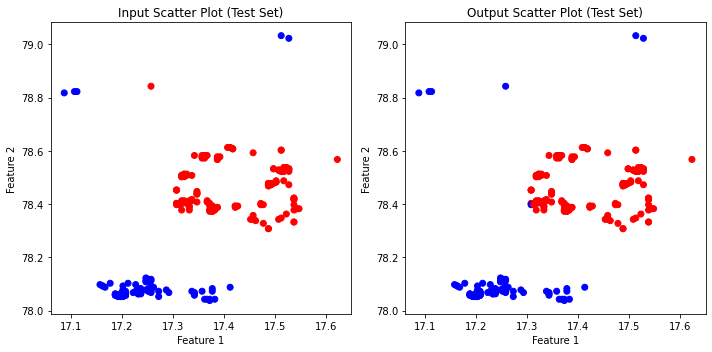

Size of Rule1_AllYearsCombined_WithNone_Model_SVM: 1195
Size of Rule1_Train_All: 956
Size of Rule1_Train: 764
Size of Rule1_Valid: 192
Size of Rule1_Test: 239

Accuracy of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
F2 Score of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
Recall of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
Confusion Matrix (Validation Set):
[[ 80   0]
 [  0 112]]

Accuracy of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set): 0.9916317991631799
F2 Score of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set): 0.9956709956709957
Recall of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set): 1.0
Confusion Matrix (Test Set):
[[ 92   0]
 [  2 145]]

Distribution of data for Year 2013
Label Counts: {2: 23276, 3: 755}

Distribution of data for Year 2020
Label Counts: {2: 22107, 3: 1585}


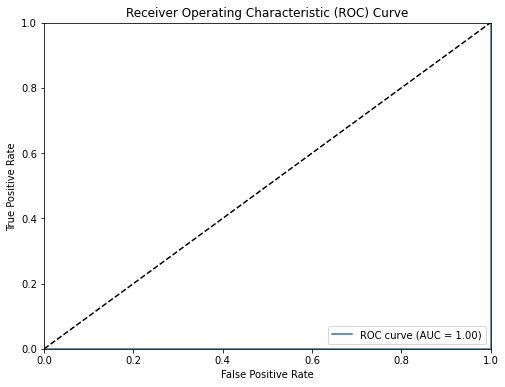

In [18]:
Rule1_Train_All, Rule1_Test = train_test_split(Rule1_AllYearsCombined_WithNone_Model_SVM, test_size=0.2, random_state=1)
Rule1_Train, Rule1_Valid = train_test_split(Rule1_Train_All, test_size=0.2, random_state=1)


X_train = Rule1_Train.iloc[:, 0:5].values
Y_train = Rule1_Train.iloc[:, 5].values
X_valid = Rule1_Valid.iloc[:, 0:5].values
Y_valid = Rule1_Valid.iloc[:, 5].values
X_test = Rule1_Test.iloc[:, 0:5].values
Y_test = Rule1_Test.iloc[:, 5].values


classifier_LATLON = SVC(kernel='rbf', random_state=1)
cv_scores = cross_val_score(classifier_LATLON, X_train, Y_train, cv=5)
classifier_LATLON.fit(X_train, Y_train)


Y_valid_pred = classifier_LATLON.predict(X_valid)
Y_pred = classifier_LATLON.predict(X_test)
Rule1_Valid["PREDICTIONS-LATLON"] = Y_valid_pred


cm_valid = confusion_matrix(Y_valid, Y_valid_pred)
accuracy_valid = float(cm_valid.diagonal().sum()) / len(Y_valid)
f2_score_valid = fbeta_score(Y_valid, Y_valid_pred, beta=2, pos_label=2)  
recall_valid = recall_score(Y_valid, Y_valid_pred, pos_label=2) 

cm_test = confusion_matrix(Y_test, Y_pred)
accuracy_test = float(cm_test.diagonal().sum()) / len(Y_test)
f2_score_test = fbeta_score(Y_test, Y_pred, beta=2, pos_label=2)  
recall_test = recall_score(Y_test, Y_pred, pos_label=2) 


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Input Scatter Plot (Test Set)")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Output Scatter Plot (Test Set)")
plt.tight_layout()
plt.show()


X_Predict_2013 = Rule1_2013_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2014 = Rule1_2014_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2015 = Rule1_2015_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2016 = Rule1_2016_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2017 = Rule1_2017_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2018 = Rule1_2018_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2019 = Rule1_2019_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2020 = Rule1_2020_WithNone_Predict_SVM.iloc[:,0:5].values

Y_Predict_2013 = classifier_LATLON.predict(X_Predict_2013)
Y_Predict_2014 = classifier_LATLON.predict(X_Predict_2014)
Y_Predict_2015 = classifier_LATLON.predict(X_Predict_2015)
Y_Predict_2016 = classifier_LATLON.predict(X_Predict_2016)
Y_Predict_2017 = classifier_LATLON.predict(X_Predict_2017)
Y_Predict_2018 = classifier_LATLON.predict(X_Predict_2018)
Y_Predict_2019 = classifier_LATLON.predict(X_Predict_2019)
Y_Predict_2020 = classifier_LATLON.predict(X_Predict_2020)

Rule1_2013_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2013
Rule1_2014_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2014
Rule1_2015_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2015
Rule1_2016_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2016
Rule1_2017_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2017
Rule1_2018_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2018
Rule1_2019_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2019
Rule1_2020_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2020


print("Size of Rule1_AllYearsCombined_WithNone_Model_SVM:", len(Rule1_AllYearsCombined_WithNone_Model_SVM))
print("Size of Rule1_Train_All:", len(Rule1_Train_All))
print("Size of Rule1_Train:", len(Rule1_Train))
print("Size of Rule1_Valid:", len(Rule1_Valid))
print("Size of Rule1_Test:", len(Rule1_Test))

print("\nAccuracy of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set):", accuracy_valid)
print("F2 Score of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set):", f2_score_valid)
print("Recall of SVM for Rule1 on AllYearsCombined with Lat+Lon (Validation Set):", recall_valid)
print("Confusion Matrix (Validation Set):")
print(cm_valid)

print("\nAccuracy of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set):", accuracy_test)
print("F2 Score of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set):", f2_score_test)
print("Recall of SVM for Rule1 on AllYearsCombined with Lat+Lon (Test Set):", recall_test)
print("Confusion Matrix (Test Set):")
print(cm_test)


years = ["2013", "2020"]
for i, year in enumerate(years):
    y_predict = globals()["Y_Predict_" + year]
    unique, counts = np.unique(y_predict, return_counts=True)
    label_counts = dict(zip(unique, counts))
    print("\nDistribution of data for Year", year)
    print("Label Counts:", label_counts)

from sklearn.metrics import roc_curve, roc_auc_score

Y_valid_scores = classifier_LATLON.decision_function(X_valid)


fpr, tpr, thresholds = roc_curve(Y_valid, Y_valid_scores, pos_label=2)
auc_score = roc_auc_score(Y_valid, Y_valid_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



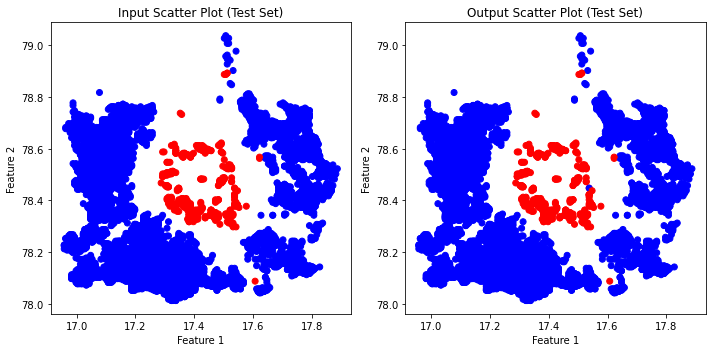

Size of Rule6_AllYearsCombined_WithNone_Model_SVM: 51050
Size of Rule6_Train_All: 40840
Size of Rule6_Train: 32672
Size of Rule6_Valid: 8168
Size of Rule6_Test: 10210

Accuracy of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set): 0.9996327130264446
F2 Score of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set): 0.9999233285626662
Recall of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
Confusion Matrix (Validation Set):
[[7825    0]
 [   3  340]]

Accuracy of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set): 0.9999020568070519
F2 Score of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set): 0.9999795797512815
Recall of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set): 1.0
Confusion Matrix (Test Set):
[[9794    0]
 [   1  415]]

Distribution of data for Year 2013
Label Counts: {2: 17287, 3: 842}

Distribution of data for Year 2020
Label Counts: {2: 15419, 3: 1690}


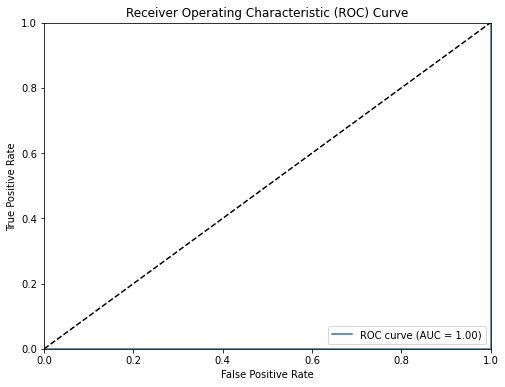

In [19]:
Rule6_Train_All, Rule6_Test = train_test_split(Rule6_AllYearsCombined_WithNone_Model_SVM, test_size=0.2, random_state=1)
Rule6_Train, Rule6_Valid = train_test_split(Rule6_Train_All, test_size=0.2, random_state=1)


X_train = Rule6_Train.iloc[:, 0:4].values
Y_train = Rule6_Train.iloc[:, 4].values
X_valid = Rule6_Valid.iloc[:, 0:4].values
Y_valid = Rule6_Valid.iloc[:, 4].values
X_test = Rule6_Test.iloc[:, 0:4].values
Y_test = Rule6_Test.iloc[:, 4].values


classifier_LATLON = SVC(kernel='rbf', random_state=1)
cv_scores = cross_val_score(classifier_LATLON, X_train, Y_train, cv=5)
classifier_LATLON.fit(X_train, Y_train)


Y_valid_pred = classifier_LATLON.predict(X_valid)
Y_pred = classifier_LATLON.predict(X_test)
Rule6_Valid["PREDICTIONS-LATLON"] = Y_valid_pred


cm_valid = confusion_matrix(Y_valid, Y_valid_pred)
accuracy_valid = float(cm_valid.diagonal().sum()) / len(Y_valid)
f2_score_valid = fbeta_score(Y_valid, Y_valid_pred, beta=2, pos_label=2)  
recall_valid = recall_score(Y_valid, Y_valid_pred, pos_label=2) 

cm_test = confusion_matrix(Y_test, Y_pred)
accuracy_test = float(cm_test.diagonal().sum()) / len(Y_test)
f2_score_test = fbeta_score(Y_test, Y_pred, beta=2, pos_label=2)  
recall_test = recall_score(Y_test, Y_pred, pos_label=2) 


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Input Scatter Plot (Test Set)")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Output Scatter Plot (Test Set)")
plt.tight_layout()
plt.show()


X_Predict_2013 = Rule6_2013_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2014 = Rule6_2014_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2015 = Rule6_2015_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2016 = Rule6_2016_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2017 = Rule6_2017_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2018 = Rule6_2018_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2019 = Rule6_2019_WithNone_Predict_SVM.iloc[:,0:4].values
X_Predict_2020 = Rule6_2020_WithNone_Predict_SVM.iloc[:,0:4].values

Y_Predict_2013 = classifier_LATLON.predict(X_Predict_2013)
Y_Predict_2014 = classifier_LATLON.predict(X_Predict_2014)
Y_Predict_2015 = classifier_LATLON.predict(X_Predict_2015)
Y_Predict_2016 = classifier_LATLON.predict(X_Predict_2016)
Y_Predict_2017 = classifier_LATLON.predict(X_Predict_2017)
Y_Predict_2018 = classifier_LATLON.predict(X_Predict_2018)
Y_Predict_2019 = classifier_LATLON.predict(X_Predict_2019)
Y_Predict_2020 = classifier_LATLON.predict(X_Predict_2020)

Rule6_2013_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2013
Rule6_2014_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2014
Rule6_2015_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2015
Rule6_2016_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2016
Rule6_2017_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2017
Rule6_2018_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2018
Rule6_2019_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2019
Rule6_2020_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2020


print("Size of Rule6_AllYearsCombined_WithNone_Model_SVM:", len(Rule6_AllYearsCombined_WithNone_Model_SVM))
print("Size of Rule6_Train_All:", len(Rule6_Train_All))
print("Size of Rule6_Train:", len(Rule6_Train))
print("Size of Rule6_Valid:", len(Rule6_Valid))
print("Size of Rule6_Test:", len(Rule6_Test))

print("\nAccuracy of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set):", accuracy_valid)
print("F2 Score of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set):", f2_score_valid)
print("Recall of SVM for Rule6 on AllYearsCombined with Lat+Lon (Validation Set):", recall_valid)
print("Confusion Matrix (Validation Set):")
print(cm_valid)

print("\nAccuracy of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set):", accuracy_test)
print("F2 Score of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set):", f2_score_test)
print("Recall of SVM for Rule6 on AllYearsCombined with Lat+Lon (Test Set):", recall_test)
print("Confusion Matrix (Test Set):")
print(cm_test)


years = ["2013", "2020"]
for i, year in enumerate(years):
    y_predict = globals()["Y_Predict_" + year]
    unique, counts = np.unique(y_predict, return_counts=True)
    label_counts = dict(zip(unique, counts))
    print("\nDistribution of data for Year", year)
    print("Label Counts:", label_counts)

from sklearn.metrics import roc_curve, roc_auc_score

Y_valid_scores = classifier_LATLON.decision_function(X_valid)


fpr, tpr, thresholds = roc_curve(Y_valid, Y_valid_scores, pos_label=2)
auc_score = roc_auc_score(Y_valid, Y_valid_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [43]:
Rule9_AllYearsCombined_WithNone_Model_SVM

,LAT,LON,RD,NTL,NLST,LABEL
0,17.3225,78.00750,0.0,0.65122,289.825187,2
2,17.3325,78.00750,0.0,0.39388,289.872558,2
3,17.3225,78.01250,0.0,0.35730,289.902430,2
5,17.3325,78.01250,0.0,0.64316,289.872270,2
6,17.3375,78.01250,0.0,0.44530,289.717397,2
...,...,...,...,...,...,...
21435,17.5875,78.80251,0.0,0.81944,290.511845,2
21436,17.5925,78.80251,0.0,0.71147,290.519780,2
23409,17.2125,78.94250,0.0,1.05441,290.517523,2
23410,17.2175,78.94250,0.0,1.25349,290.494167,2


In [42]:

unique, counts = np.unique(Rule9_AllYearsCombined_WithNone_Model_SVM, return_counts=True)
label_counts = dict(zip(unique, counts))
print("\nDistribution of data for Year", year)
print("Label Counts:", label_counts)


Distribution of data for Year 2020
Label Counts: {0.0: 37707, 0.12: 1, 0.12444: 1, 0.13595: 1, 0.13681: 1, 0.14432: 1, 0.14637: 1, 0.14999: 1, 0.15288: 1, 0.15661: 1, 0.15951: 1, 0.16208: 1, 0.16256: 1, 0.1665: 1, 0.167: 1, 0.16889: 1, 0.16891: 1, 0.17077: 1, 0.17401: 1, 0.17441: 1, 0.17489: 1, 0.17545: 1, 0.17563: 1, 0.17624: 1, 0.1772: 1, 0.17757: 1, 0.1777: 1, 0.17793: 1, 0.17877: 1, 0.1788: 1, 0.17884: 1, 0.17887: 1, 0.17997: 1, 0.1804: 1, 0.18081: 1, 0.1809: 1, 0.18124: 1, 0.18181: 1, 0.18478: 1, 0.1848: 1, 0.18702: 1, 0.18725: 1, 0.18791: 1, 0.18828: 1, 0.18841: 1, 0.18863: 1, 0.18864: 1, 0.18876: 1, 0.18891: 1, 0.18946: 1, 0.19052: 1, 0.19108: 1, 0.19126: 1, 0.19164: 1, 0.19191: 1, 0.19212: 1, 0.19262: 1, 0.19272: 1, 0.19281: 1, 0.19325: 1, 0.19372: 1, 0.19382: 1, 0.19426: 1, 0.19469: 1, 0.19531: 1, 0.19537: 1, 0.19582: 1, 0.19588: 1, 0.19612: 1, 0.19627: 1, 0.19676: 1, 0.19708: 1, 0.19748: 1, 0.19767: 1, 0.19772: 1, 0.19796: 1, 0.19804: 1, 0.19811: 1, 0.19814: 1, 0.19832: 1, 0

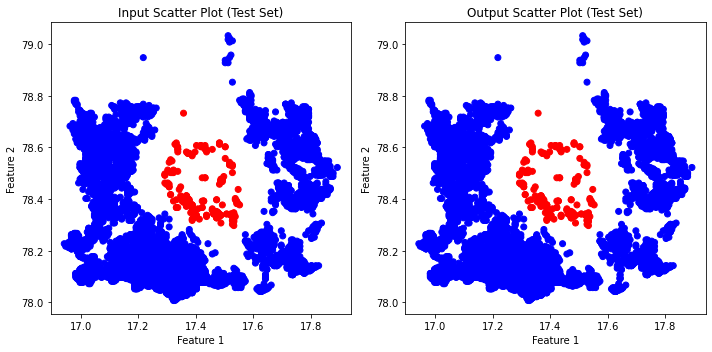

Size of Rule9_AllYearsCombined_WithNone_Model_SVM: 38715
Size of Rule9_Train_All: 30972
Size of Rule9_Train: 24777
Size of Rule9_Valid: 6195
Size of Rule9_Test: 7743

Accuracy of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
F2 Score of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
Recall of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set): 1.0
Confusion Matrix (Validation Set):
[[6027    0]
 [   0  168]]

Accuracy of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set): 1.0
F2 Score of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set): 1.0
Recall of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set): 1.0
Confusion Matrix (Test Set):
[[7544    0]
 [   0  199]]

Distribution of data for Year 2013
Label Counts: {2: 16442, 3: 2115}

Distribution of data for Year 2020
Label Counts: {2: 9731, 3: 9722}


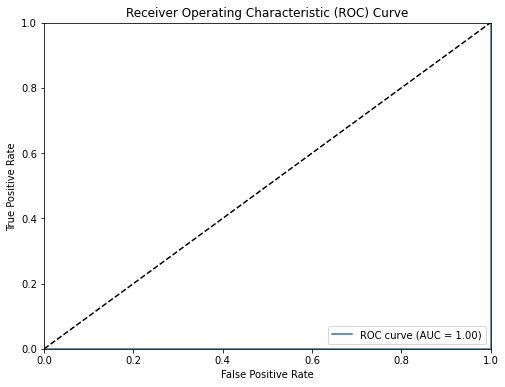

In [20]:
Rule9_Train_All, Rule9_Test = train_test_split(Rule9_AllYearsCombined_WithNone_Model_SVM, test_size=0.2, random_state=1)
Rule9_Train, Rule9_Valid = train_test_split(Rule9_Train_All, test_size=0.2, random_state=1)


X_train = Rule9_Train.iloc[:, 0:5].values
Y_train = Rule9_Train.iloc[:, 5].values
X_valid = Rule9_Valid.iloc[:, 0:5].values
Y_valid = Rule9_Valid.iloc[:, 5].values
X_test = Rule9_Test.iloc[:, 0:5].values
Y_test = Rule9_Test.iloc[:, 5].values


classifier_LATLON = SVC(kernel='rbf', random_state=1)
cv_scores = cross_val_score(classifier_LATLON, X_train, Y_train, cv=5)
classifier_LATLON.fit(X_train, Y_train)


Y_valid_pred = classifier_LATLON.predict(X_valid)
Y_pred = classifier_LATLON.predict(X_test)
Rule9_Valid["PREDICTIONS-LATLON"] = Y_valid_pred


cm_valid = confusion_matrix(Y_valid, Y_valid_pred)
accuracy_valid = float(cm_valid.diagonal().sum()) / len(Y_valid)
f2_score_valid = fbeta_score(Y_valid, Y_valid_pred, beta=2, pos_label=2)  
recall_valid = recall_score(Y_valid, Y_valid_pred, pos_label=2) 

cm_test = confusion_matrix(Y_test, Y_pred)
accuracy_test = float(cm_test.diagonal().sum()) / len(Y_test)
f2_score_test = fbeta_score(Y_test, Y_pred, beta=2, pos_label=2)  
recall_test = recall_score(Y_test, Y_pred, pos_label=2) 


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Input Scatter Plot (Test Set)")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Output Scatter Plot (Test Set)")
plt.tight_layout()
plt.show()


X_Predict_2013 = Rule9_2013_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2014 = Rule9_2014_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2015 = Rule9_2015_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2016 = Rule9_2016_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2017 = Rule9_2017_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2018 = Rule9_2018_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2019 = Rule9_2019_WithNone_Predict_SVM.iloc[:,0:5].values
X_Predict_2020 = Rule9_2020_WithNone_Predict_SVM.iloc[:,0:5].values

Y_Predict_2013 = classifier_LATLON.predict(X_Predict_2013)
Y_Predict_2014 = classifier_LATLON.predict(X_Predict_2014)
Y_Predict_2015 = classifier_LATLON.predict(X_Predict_2015)
Y_Predict_2016 = classifier_LATLON.predict(X_Predict_2016)
Y_Predict_2017 = classifier_LATLON.predict(X_Predict_2017)
Y_Predict_2018 = classifier_LATLON.predict(X_Predict_2018)
Y_Predict_2019 = classifier_LATLON.predict(X_Predict_2019)
Y_Predict_2020 = classifier_LATLON.predict(X_Predict_2020)

Rule9_2013_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2013
Rule9_2014_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2014
Rule9_2015_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2015
Rule9_2016_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2016
Rule9_2017_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2017
Rule9_2018_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2018
Rule9_2019_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2019
Rule9_2020_WithNone_Predict_SVM['ALL-PREDICTION-LATLON'] = Y_Predict_2020


print("Size of Rule9_AllYearsCombined_WithNone_Model_SVM:", len(Rule9_AllYearsCombined_WithNone_Model_SVM))
print("Size of Rule9_Train_All:", len(Rule9_Train_All))
print("Size of Rule9_Train:", len(Rule9_Train))
print("Size of Rule9_Valid:", len(Rule9_Valid))
print("Size of Rule9_Test:", len(Rule9_Test))

print("\nAccuracy of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set):", accuracy_valid)
print("F2 Score of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set):", f2_score_valid)
print("Recall of SVM for Rule9 on AllYearsCombined with Lat+Lon (Validation Set):", recall_valid)
print("Confusion Matrix (Validation Set):")
print(cm_valid)

print("\nAccuracy of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set):", accuracy_test)
print("F2 Score of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set):", f2_score_test)
print("Recall of SVM for Rule9 on AllYearsCombined with Lat+Lon (Test Set):", recall_test)
print("Confusion Matrix (Test Set):")
print(cm_test)


years = ["2013", "2020"]
for i, year in enumerate(years):
    y_predict = globals()["Y_Predict_" + year]
    unique, counts = np.unique(y_predict, return_counts=True)
    label_counts = dict(zip(unique, counts))
    print("\nDistribution of data for Year", year)
    print("Label Counts:", label_counts)

from sklearn.metrics import roc_curve, roc_auc_score

Y_valid_scores = classifier_LATLON.decision_function(X_valid)


fpr, tpr, thresholds = roc_curve(Y_valid, Y_valid_scores, pos_label=2)
auc_score = roc_auc_score(Y_valid, Y_valid_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [21]:
Rule1_2013_WithOutNone = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] != 0]
Rule6_2013_WithOutNone = Rule6_2013_WithNone[Rule6_2013_WithNone['LABEL'] != 0]
Rule9_2013_WithOutNone = Rule9_2013_WithNone[Rule9_2013_WithNone['LABEL'] != 0]
Rule1_2020_WithOutNone = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] != 0]
Rule6_2020_WithOutNone = Rule6_2020_WithNone[Rule6_2020_WithNone['LABEL'] != 0]
Rule9_2020_WithOutNone = Rule9_2020_WithNone[Rule9_2020_WithNone['LABEL'] != 0]
total_points = 26485


percentage_rule1_2013 = (Rule1_2013_WithOutNone.shape[0] / total_points) * 100
percentage_rule6_2013 = (Rule6_2013_WithOutNone.shape[0] / total_points) * 100
percentage_rule9_2013 = (Rule9_2013_WithOutNone.shape[0] / total_points) * 100
percentage_rule1_2020 = (Rule1_2020_WithOutNone.shape[0] / total_points) * 100
percentage_rule6_2020 = (Rule6_2020_WithOutNone.shape[0] / total_points) * 100
percentage_rule9_2020 = (Rule9_2020_WithOutNone.shape[0] / total_points) * 100


print("Percentage of points labelled by Rule 1 in 2013 by thresholding alone: {:.2f}%".format(percentage_rule1_2013))
print("Percentage of points labelled by Rule 6 in 2013 by thresholding alone: {:.2f}%".format(percentage_rule6_2013))
print("Percentage of points labelled by Rule 9 in 2013 by thresholding alone: {:.2f}%".format(percentage_rule9_2013))
print("Percentage of points labelled by Rule 1 in 2020 by thresholding alone: {:.2f}%".format(percentage_rule1_2020))
print("Percentage of points labelled by Rule 6 in 2020 by thresholding alone: {:.2f}%".format(percentage_rule6_2020))
print("Percentage of points labelled by Rule 9 in 2020 by thresholding alone: {:.2f}%".format(percentage_rule9_2020))


Percentage of points labelled by Rule 1 in 2013 by thresholding alone: 9.16%
Percentage of points labelled by Rule 6 in 2013 by thresholding alone: 31.45%
Percentage of points labelled by Rule 9 in 2013 by thresholding alone: 29.83%
Percentage of points labelled by Rule 1 in 2020 by thresholding alone: 10.44%
Percentage of points labelled by Rule 6 in 2020 by thresholding alone: 35.30%
Percentage of points labelled by Rule 9 in 2020 by thresholding alone: 26.45%


In [22]:
Rule1_2013_WithOutNone = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] != 0]
Rule6_2013_WithOutNone = Rule6_2013_WithNone[Rule6_2013_WithNone['LABEL'] != 0]
Rule9_2013_WithOutNone = Rule9_2013_WithNone[Rule9_2013_WithNone['LABEL'] != 0]
Rule1_2020_WithOutNone = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] != 0]
Rule6_2020_WithOutNone = Rule6_2020_WithNone[Rule6_2020_WithNone['LABEL'] != 0]
Rule9_2020_WithOutNone = Rule9_2020_WithNone[Rule9_2020_WithNone['LABEL'] != 0]
total_points = 26485


percentage_rule1_2013 = (Rule1_2013_WithOutNone.shape[0] / total_points) * 100
percentage_rule6_2013 = (Rule6_2013_WithOutNone.shape[0] / total_points) * 100
percentage_rule9_2013 = Rule9_2013_WithOutNone.shape[0]
percentage_rule1_2020 = (Rule1_2020_WithOutNone.shape[0] / total_points) * 100
percentage_rule6_2020 = (Rule6_2020_WithOutNone.shape[0] / total_points) * 100
percentage_rule9_2020 = Rule9_2020_WithOutNone.shape[0]


print("Percentage of points labelled by Rule 1 in 2013 by thresholding alone: {:.2f}%".format(percentage_rule1_2013))
print("Percentage of points labelled by Rule 6 in 2013 by thresholding alone: {:.2f}%".format(percentage_rule6_2013))
print("Percentage of points labelled by Rule 9 in 2013 by thresholding alone: ", percentage_rule9_2013)
print("Percentage of points labelled by Rule 1 in 2020 by thresholding alone: {:.2f}%".format(percentage_rule1_2020))
print("Percentage of points labelled by Rule 6 in 2020 by thresholding alone: {:.2f}%".format(percentage_rule6_2020))
print("Percentage of points labelled by Rule 9 in 2020 by thresholding alone: ", percentage_rule9_2020)


Percentage of points labelled by Rule 1 in 2013 by thresholding alone: 9.16%
Percentage of points labelled by Rule 6 in 2013 by thresholding alone: 31.45%
Percentage of points labelled by Rule 9 in 2013 by thresholding alone:  7901
Percentage of points labelled by Rule 1 in 2020 by thresholding alone: 10.44%
Percentage of points labelled by Rule 6 in 2020 by thresholding alone: 35.30%
Percentage of points labelled by Rule 9 in 2020 by thresholding alone:  7005


In [45]:
Rule1_2013_WithOutNone = Rule1_2013_WithNone[Rule1_2013_WithNone['LABEL'] != 0]
percentage_rule1_2013 = Rule1_2013_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2013 by thresholding alone: ", percentage_rule1_2013)
Rule1_2014_WithOutNone = Rule1_2014_WithNone[Rule1_2014_WithNone['LABEL'] != 0]
percentage_rule1_2014 = Rule1_2014_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2014 by thresholding alone: ", percentage_rule1_2014)
Rule1_2015_WithOutNone = Rule1_2015_WithNone[Rule1_2015_WithNone['LABEL'] != 0]
percentage_rule1_2015 = Rule1_2015_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2015 by thresholding alone: ", percentage_rule1_2015)
Rule1_2016_WithOutNone = Rule1_2016_WithNone[Rule1_2016_WithNone['LABEL'] != 0]
percentage_rule1_2016 = Rule1_2016_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2016 by thresholding alone: ", percentage_rule1_2016)
Rule1_2017_WithOutNone = Rule1_2017_WithNone[Rule1_2017_WithNone['LABEL'] != 0]
percentage_rule1_2017 = Rule1_2017_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2017 by thresholding alone: ", percentage_rule1_2017)
Rule1_2018_WithOutNone = Rule1_2018_WithNone[Rule1_2018_WithNone['LABEL'] != 0]
percentage_rule1_2018 = Rule1_2018_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2018 by thresholding alone: ", percentage_rule1_2018)
Rule1_2019_WithOutNone = Rule1_2019_WithNone[Rule1_2019_WithNone['LABEL'] != 0]
percentage_rule1_2019 = Rule1_2019_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2019 by thresholding alone: ", percentage_rule1_2019)
Rule1_2020_WithOutNone = Rule1_2020_WithNone[Rule1_2020_WithNone['LABEL'] != 0]
percentage_rule1_2020 = Rule1_2020_WithOutNone.shape[0]
print("Percentage of points labelled by Rule 9 in 2020 by thresholding alone: ", percentage_rule1_2020)

Percentage of points labelled by Rule 9 in 2013 by thresholding alone:  2427
Percentage of points labelled by Rule 9 in 2014 by thresholding alone:  2469
Percentage of points labelled by Rule 9 in 2015 by thresholding alone:  2550
Percentage of points labelled by Rule 9 in 2016 by thresholding alone:  2537
Percentage of points labelled by Rule 9 in 2017 by thresholding alone:  2524
Percentage of points labelled by Rule 9 in 2018 by thresholding alone:  2692
Percentage of points labelled by Rule 9 in 2019 by thresholding alone:  2683
Percentage of points labelled by Rule 9 in 2020 by thresholding alone:  2766


In [46]:
label_frequency = Rule1_2013_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2320
3      65
1      27
2      15
Name: LABEL, dtype: int64


In [47]:
label_frequency = Rule1_2014_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2350
3      76
1      27
2      16
Name: LABEL, dtype: int64


In [48]:
label_frequency = Rule1_2015_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2356
3      92
2      80
1      22
Name: LABEL, dtype: int64


In [49]:
label_frequency = Rule1_2016_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2360
3     102
2      57
1      18
Name: LABEL, dtype: int64


In [50]:
label_frequency = Rule1_2017_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2371
3      79
2      38
1      36
Name: LABEL, dtype: int64


In [51]:
label_frequency = Rule1_2018_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2432
3     110
2     101
1      49
Name: LABEL, dtype: int64


In [52]:
label_frequency = Rule1_2019_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2485
3      98
2      65
1      35
Name: LABEL, dtype: int64


In [53]:
label_frequency = Rule1_2020_WithOutNone['LABEL'].value_counts()
print(label_frequency)

4    2550
2     120
3      81
1      15
Name: LABEL, dtype: int64
